
# ***Statistical Machine Learning - Final progect***





Rondinone Francesca\
SDS student

First we need to import the libraries we will use later on.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor

import itertools
from sklearn.model_selection import KFold

from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

!pip install pygam
from pygam import LinearGAM,s
from functools import reduce

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.cross_decomposition  import PLSRegression


##  Data cleaning







As first step, lets import the data set.

In [2]:
sales_df=pd.read_csv('sales.csv')
market_df=pd.read_csv('market.csv')

### Data cleaning of **sales_df**

In [3]:
sales_df

,market_id,date,is_open,sales_amount,
0,XC14,31/12/2022,YES,55727.34,NaN
1,WG25,31/12/2022,YES,12984.10,NaN
2,UX72,31/12/2022,YES,13046.56,NaN
3,EE84,31/12/2022,YES,60916.76,NaN
4,RF54,31/12/2022,YES,12376.42,NaN
...,...,...,...,...,...
523944,ZM74,01/01/2021,YES,21553.84,NaN
523945,WW60,01/01/2021,YES,56371.18,NaN
523946,LU14,01/01/2021,YES,24107.19,NaN
523947,HY57,01/01/2021,YES,12257.38,NaN


The data set contains 5 columns


*   **market_id**: it is a reference to a specific store
*   **date**: it contains temporal informations
* **is_open**: for each store anche each day, it shows if the store was open or not
* **sales_amount**: it contains the amount earned from that market the related day.



It could happen that the data contains duplicates, we use the following command to remove them.

In [4]:
sales_df.drop_duplicates()

,market_id,date,is_open,sales_amount,
0,XC14,31/12/2022,YES,55727.34,NaN
1,WG25,31/12/2022,YES,12984.10,NaN
2,UX72,31/12/2022,YES,13046.56,NaN
3,EE84,31/12/2022,YES,60916.76,NaN
4,RF54,31/12/2022,YES,12376.42,NaN
...,...,...,...,...,...
523944,ZM74,01/01/2021,YES,21553.84,NaN
523945,WW60,01/01/2021,YES,56371.18,NaN
523946,LU14,01/01/2021,YES,24107.19,NaN
523947,HY57,01/01/2021,YES,12257.38,NaN


Comparing with the previus step, it is possible to notice that there were no duplicates.

In [5]:
# next, let's find out the number of rows and columns
n_rows_S = sales_df.shape[0]
n_cols_S = sales_df.shape[1]
print(f"Number of rows is {n_rows_S}, and number of columns is {n_cols_S}")

Number of rows is 523949, and number of columns is 5


It seems that the last column has only NaN values. With the command 'unique()' we check our hypothesis and eventually remove it.

In [6]:
sales_df[" "].unique()

array([nan])

In [7]:
sales_df.columns = ['market_id', 'date', 'is_open', 'sales_amount', 'no_needed']
sales_df = sales_df.drop('no_needed', axis=1)

Now we would like to see if there are any other NaN values.

In [8]:
sales_df.isnull().sum()

market_id        1
date             1
is_open          1
sales_amount    15
dtype: int64

They are present. The first column we will explore is **'sales_amount'**.

In [9]:
sales_df[sales_df['sales_amount'].isnull()]

,market_id,date,is_open,sales_amount
98,OG21,31/12/2022,YES,NaN
174088,UF73,12/04/2022,YES,NaN
223239,BY57,05/02/2022,YES,NaN
477294,NaN,NaN,NaN,NaN
509998,NL22,19/01/2021,YES,NaN
509999,QX97,19/01/2021,YES,NaN
510000,AB90,19/01/2021,YES,NaN
510001,KR60,19/01/2021,YES,NaN
510002,SF72,19/01/2021,YES,NaN
510003,SY36,19/01/2021,YES,NaN


It is evident that row number 477294 has all NaN values. We remove it.

In [10]:
#save corrsponding id
idx_row_nan = []
for i in range(len(sales_df)):
  if str(sales_df.at[i,'market_id']).casefold() == "NaN".casefold():
   idx_row_nan.append(i)

# idx_row_nan = 477294
print(idx_row_nan)

#since is all null, eremove
sales_df.drop(idx_row_nan[0], inplace= True, axis=0)

[477294]


At this point, we make some checks of the column **'sales_amount**' before treating the NaN values.

In [11]:
#sales_amout less than zero
sales_df[sales_df['sales_amount']<0 ]

,market_id,date,is_open,sales_amount
47528,XC14,16/10/2022,YES,-999999.0
48150,XC14,15/10/2022,YES,-999999.0
48772,XC14,14/10/2022,YES,-999999.0
49394,XC14,13/10/2022,YES,-999999.0
50016,XC14,12/10/2022,YES,-999999.0
50638,XC14,11/10/2022,YES,-999999.0


In [12]:
#check if the same day the market was open
sales_df[ (sales_df['sales_amount']<0) & (sales_df['is_open']=="YES")]

,market_id,date,is_open,sales_amount
47528,XC14,16/10/2022,YES,-999999.0
48150,XC14,15/10/2022,YES,-999999.0
48772,XC14,14/10/2022,YES,-999999.0
49394,XC14,13/10/2022,YES,-999999.0
50016,XC14,12/10/2022,YES,-999999.0
50638,XC14,11/10/2022,YES,-999999.0


In [13]:
#the marcket_id is the same, so we proceed with a substitution conditionind on the marcket id and the openess condition
mean_sales_amount_XC14= round(sales_df[(sales_df['market_id']=="XC14") & (sales_df['is_open']=="YES") &
 (sales_df['sales_amount']>0)]['sales_amount'].mean(),2)

idx_less_zero = sales_df[sales_df['sales_amount']<0 ].index.tolist()

for i in idx_less_zero:
    sales_df['sales_amount'].replace(to_replace= sales_df.iloc[i] ['sales_amount'], value= mean_sales_amount_XC14, inplace= True)
#check
print(sales_df.loc[idx_less_zero])

      market_id        date is_open  sales_amount
47528      XC14  16/10/2022     YES       60603.9
48150      XC14  15/10/2022     YES       60603.9
48772      XC14  14/10/2022     YES       60603.9
49394      XC14  13/10/2022     YES       60603.9
50016      XC14  12/10/2022     YES       60603.9
50638      XC14  11/10/2022     YES       60603.9


In [14]:
#Now we check the opposite, open store but not zero sales_amount
sales_df[ (sales_df['sales_amount']!= 0) & (sales_df['is_open']=="NO")]

,market_id,date,is_open,sales_amount
753,EE84,30/12/2022,NO,9999999.0


Since this store 'EE84' was not open on the '30/12/2022', we change the related sales_amount with 0.

In [15]:
idx_closed= sales_df[ (sales_df['sales_amount']!= 0) & (sales_df['is_open']=="NO")].index
#753
sales_df.loc[idx_closed[0], 'sales_amount']=0

At this point, we checked all the elements of the above-mentioned column and the last step is to substitute the NaN values.

In [16]:
need_change = sales_df[sales_df['sales_amount'].isnull()].index
print(need_change)

mean_value= round(sales_df.groupby(by= "market_id", as_index= False)['sales_amount'].mean(),2)
print(mean_value)

for i in need_change:
    for j in mean_value.index:
        if mean_value.loc[j, 'market_id'] == sales_df.loc[i, 'market_id']:
            sales_df.loc[i, 'sales_amount']= mean_value.loc[j, 'sales_amount']

Int64Index([    98, 174088, 223239, 509998, 509999, 510000, 510001, 510002,
            510003, 510004, 510005, 510006, 510007, 510008],
           dtype='int64')
    market_id  sales_amount
0        AA39      10433.13
1        AA82      21804.16
2        AB90      21680.65
3        AC71       9728.27
4        AD13      10219.61
..        ...           ...
745      ZX46      10435.28
746      ZX76      10154.05
747      ZY62      21847.30
748      ZZ11      10268.11
749      ZZ13      10350.47

[750 rows x 2 columns]


Let move to the column '**is_open**'.

In [17]:
print(sales_df[(sales_df['is_open'] != 'YES') & (sales_df['is_open'] != 'NO')])

#since has a sales_amount <0 we can suppose that it was open
idx_YESS= sales_df[(sales_df['is_open'] != 'YES') & (sales_df['is_open'] != 'NO')].index
#we found a value "YESS", let replace with "YES"
sales_df.loc[idx_YESS[0], 'is_open' ]= "YES"

      market_id        date is_open  sales_amount
49154      BT51  14/10/2022    YESS      25220.48


Next column to analyze is **'date'**.

In [18]:
#check if it has the right format
print(sales_df.dtypes)
#it does not
sales_df["date"] = pd.to_datetime(sales_df["date"], dayfirst=True)

market_id        object
date             object
is_open          object
sales_amount    float64
dtype: object


We know that the data has been collecting between '01/01/2021' and '31/12/2022'. We now controll if the are the extreme dates.

In [19]:
# now i want to check dates correctness
print( 'The number of dates out of the periond is:', ((sales_df['date']<(sales_df['date'].min())) | (sales_df['date']>(sales_df['date'].max()))).sum())
print('The starting of the period of data collection is', sales_df['date'].min(),' and the end is ' , sales_df['date'].max() )


The number of dates out of the periond is: 0
The starting of the period of data collection is 2021-01-01 00:00:00  and the end is  2022-12-31 00:00:00


The remaining column is '**market_id**'.

In [20]:
len(sales_df['market_id'].unique())

750

We obtained that the number of stores analysed was 750 and it is in agreement with the number of row of the data frame 'market_df' (See below).

In [21]:
#uptate od the number of rows and columns od sales_df
sales_df=sales_df.reset_index(drop=True)

n_rows_S = sales_df.shape[0]
n_cols_S = sales_df.shape[1]
print(f"Number of rows is {n_rows_S}, and number of columns is {n_cols_S}.")

Number of rows is 523948, and number of columns is 4.


### Data cleaning of **market_df**

In [22]:
market_df

,id,country,Unnamed: 2,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,SPAIN,NaN,HYPER,11135,773.0,515,YES
1,WG25,FRANCE,NaN,MINI,1402,252.0,522,YES
2,UX72,FRANCE,NaN,MINI,1452,265.0,15939,YES
3,EE84,SPAIN,NaN,HYPER,15259,874.0,754,YES
4,RF54,FRANCE,NaN,MINI,2497,191.0,34007,YES
...,...,...,...,...,...,...,...,...
745,ZM74,ITALY,NaN,SUPER,5778,356.0,4424,YES
746,WW60,FRANCE,NaN,HYPER,10923,907.0,41359,YES
747,LU14,ITALY,NaN,SUPER,5742,397.0,2841,YES
748,HY57,ITALY,NaN,MINI,2495,228.0,3848,YES


The data set 'market' is made by 8 columns.


*   **id**: it is a reference to a specific store
*   **country**: it contains the name of the coutry in which is located the stare. The possible options should be {FRANCE, SPAIN, ITALY}
* **market_type**: it contains the type of the market. The possible options should be {HYPER, SUPER, MINI}
* **square_feet**: it indicates the square feet of the market
* **avg_customers**: it contains the daily average of customers of the store
* **competitor_distance**: it contains the distance in metres from the nearest competitor
* **has_promotions**: it says whenever or not the store has promotions
* **Unnamed: 2**: not clear, let analyze.




First of all, we drop duplicates (if they are present).

In [23]:
market_df.drop_duplicates

<bound method DataFrame.drop_duplicates of        id country  Unnamed: 2 market_type  square_feet  avg_customers  \
0    XC14   SPAIN         NaN       HYPER        11135          773.0   
1    WG25  FRANCE         NaN        MINI         1402          252.0   
2    UX72  FRANCE         NaN        MINI         1452          265.0   
3    EE84   SPAIN         NaN       HYPER        15259          874.0   
4    RF54  FRANCE         NaN        MINI         2497          191.0   
..    ...     ...         ...         ...          ...            ...   
745  ZM74   ITALY         NaN       SUPER         5778          356.0   
746  WW60  FRANCE         NaN       HYPER        10923          907.0   
747  LU14   ITALY         NaN       SUPER         5742          397.0   
748  HY57   ITALY         NaN        MINI         2495          228.0   
749  QD17  FRANCE         NaN       SUPER         6806          516.0   

     competitor_distance has_promotions  
0                    515            YE

In [24]:
market_df['Unnamed: 2'].unique()

array([nan])

In [25]:
# we can remove it
market_df= market_df.drop('Unnamed: 2', axis=1)

In [26]:
# next, let's find out the number of rows and columns
n_rows_M = market_df.shape[0]
n_cols_M = market_df.shape[1]
print(f"Number of rows is {n_rows_M}, and number of columns is {n_cols_M}")

Number of rows is 750, and number of columns is 7


Now we want to controll che correctness of each column and replace NaN values, if present.
To do so, we check the type of each column and the number of NaN values.


In [27]:
#types of the columns
market_df.dtypes

id                      object
country                 object
market_type             object
square_feet              int64
avg_customers          float64
competitor_distance      int64
has_promotions          object
dtype: object

In [28]:
market_df.isnull().sum()

id                     0
country                0
market_type            2
square_feet            0
avg_customers          1
competitor_distance    0
has_promotions         0
dtype: int64

We start from the column **'id'** .


In [29]:
market_df['id'].value_counts()

XC14    1
JY53    1
GA53    1
HB66    1
ZH78    1
       ..
FG14    1
KI52    1
CK50    1
BZ83    1
QD17    1
Name: id, Length: 750, dtype: int64

They are 750, which is the number of columns of the data frame 'market_df' and also the number of different 'market_id' of 'sales_df'. We concluded that there are no repetitions.\
Now we consider the column **'country'**.

In [30]:
market_df['country'].unique()

array(['SPAIN', 'FRANCE', 'ITALY'], dtype=object)

There are not values different from {FRANCE, SPAIN, ITALY}, hence we can proceed with che column **'market_type'**.

In [31]:
market_df['market_type'].unique()


array(['HYPER', 'MINI', 'SUPER', nan], dtype=object)

In [32]:
#replace nan
print(market_df[market_df['market_type'].isnull()])

idx_type=market_df[market_df['market_type'].isnull()].index.tolist()
print('The index we need to replce are:' , idx_type)

       id country market_type  square_feet  avg_customers  \
90   RU30   SPAIN         NaN        14305          637.0   
225  KB10   ITALY         NaN         1520          150.0   

     competitor_distance has_promotions  
90                  1701            YES  
225                  479            YES  
The index we need to replce are: [90, 225]


In [33]:
#mean for each type of store
avg_hyper_square = round( market_df[market_df['market_type'] == 'HYPER'].loc[:,'square_feet'].mean() ,2)
avg_super_square = round( market_df[market_df['market_type'] == 'SUPER'].loc[:,'square_feet'].mean() , 2)
avg_mini_square = round(market_df[market_df['market_type'] == 'MINI'].loc[:,'square_feet'].mean() , 2)

print('The average square feet for hyper store are:', avg_hyper_square)
print('The average square feet for super store are:', avg_super_square)
print('The average square feet for mini store are:', avg_mini_square)

The average square feet for hyper store are: 12090.55
The average square feet for super store are: 6054.5
The average square feet for mini store are: 2009.96


Comparing these result with the square feet of the store 'RU30' we can classify it as 'HYPER' and simirarly we place 'KB10' in the list of 'MINI'.

In [34]:
market_df.loc[225, 'market_type']= 'MINI' #less than the mean of the mini market
print('-----------------New values for row 225:-------------------')
print(market_df.loc[225])

market_df.loc[90, 'market_type']= 'HYPER' #greater than the mean of the Hyper market
print('-----------------New values for row 90:-------------------')
print(market_df.loc[90])


-----------------New values for row 225:-------------------
id                      KB10
country                ITALY
market_type             MINI
square_feet             1520
avg_customers          150.0
competitor_distance      479
has_promotions           YES
Name: 225, dtype: object
-----------------New values for row 90:-------------------
id                      RU30
country                SPAIN
market_type            HYPER
square_feet            14305
avg_customers          637.0
competitor_distance     1701
has_promotions           YES
Name: 90, dtype: object


For the column **'square_feet'** we controll that the values are positive.

In [35]:
(market_df['square_feet']<=0).sum()

0

For the column '**avg_customers**', first of all we check if there are some negative values.

In [36]:
market_df[market_df['avg_customers']<0]

,id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
69,IP89,SPAIN,HYPER,15560,-9999.0,6281,YES


In [37]:
idx_avg_customers = market_df[market_df['avg_customers']<0].index.tolist()
df = market_df.drop(idx_avg_customers[0], axis=0)
# mean for state and market type without considering the previus row
mean_avg_customers= df.groupby(by= ["country", "market_type"], as_index=False) ['avg_customers'].mean()
market_df.at[idx_avg_customers[0], 'avg_customers']= mean_avg_customers.loc[(mean_avg_customers['country']== 'SPAIN') & (mean_avg_customers['market_type']== 'HYPER'), ['avg_customers']]['avg_customers']


Let see if there are any NaN values in this column.

In [38]:
market_df.isnull().sum()

id                     0
country                0
market_type            0
square_feet            0
avg_customers          1
competitor_distance    0
has_promotions         0
dtype: int64

In [39]:
market_df[market_df['avg_customers'].isnull()]

,id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
626,OD40,ITALY,HYPER,14157,NaN,3519,YES


In [40]:
idx_avg_cust_nan = market_df[market_df['avg_customers'].isnull()].index.tolist() #626
print(mean_avg_customers)

  country market_type  avg_customers
0  FRANCE       HYPER     688.258065
1  FRANCE        MINI     210.527778
2  FRANCE       SUPER     401.396825
3   ITALY       HYPER     733.785714
4   ITALY        MINI     208.646018
5   ITALY       SUPER     401.293103
6   SPAIN       HYPER     763.483871
7   SPAIN        MINI     214.329114
8   SPAIN       SUPER     405.333333


The store 'OD40' is located in Italy and it is classify as an hyper store, so we consider the related mean from the table 'mean_avg_customers' showed above.

In [41]:
market_df.at[idx_avg_cust_nan[0], 'avg_customers']= mean_avg_customers.loc[(mean_avg_customers['country']== 'ITALY') & (mean_avg_customers['market_type']== 'HYPER'), ['avg_customers']]['avg_customers']

The column **avg_costumers** should contain only interger numbers but now float values are allowed.

In [42]:
market_df['avg_customers']= market_df['avg_customers'].astype('int64')

For the column '**competitor_distance**', we suppose that the values are all positive. Lets check.

In [43]:
market_df[market_df['competitor_distance']<=0]

,id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
290,YT57,SPAIN,SUPER,5277,501,0,YES
621,IJ54,FRANCE,MINI,1519,226,0,YES


The result is that no market has negative distance from the competitors and two have a zero distance. These latter two are located in different countries so we suppose that there are no mistakes. Our interpretation is that in the same structures, that could be a shopping center, there are two different market own by two different companies and we are considering only the store of one of them.

Finally, we check the column 'has_promotions'. Obviously the only two acceptable options are 'YES' and 'NO'.

In [44]:
market_df['has_promotions'].unique()

array(['YES', 'NO'], dtype=object)

In [45]:
#updatign number of nows and columns
market_df=market_df.reset_index(drop=True)

n_rows_M = market_df.shape[0]
n_cols_M = market_df.shape[1]
print(f"Number of rows is {n_rows_M}, and number of columns is {n_cols_M}")

Number of rows is 750, and number of columns is 7


## Generate the dataset

We want to merge the two tables using an inner joint on the common column 'market_id', which is our primary key, but first we need to check that the values of the column on which we want to join are the same.

In [46]:
id_market= market_df['id'].tolist()
id_sales= sales_df['market_id'].tolist()

if any(item not in id_sales for item in id_market) or any(item not in id_market for item in id_sales):
    print("The elements of the two lists are different.")
else:
    print("The elements of the two lists are the same.")


The elements of the two lists are the same.


Before proceding, we also need to group by the column of IDs of 'sales_df'.

In [47]:
sales_collapsed=sales_df.groupby('market_id', as_index=False).mean()
sales_collapsed.columns=['id','avg_sales_amount']
sales_collapsed

C:\Users\franc\AppData\Local\Temp\ipykernel_16328\4290527598.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_collapsed=sales_df.groupby('market_id', as_index=False).mean()


,id,avg_sales_amount
0,AA39,10433.131548
1,AA82,21804.155256
2,AB90,21680.647027
3,AC71,9728.267912
4,AD13,10219.610630
...,...,...
745,ZX46,10435.278082
746,ZX76,10154.048388
747,ZY62,21847.301630
748,ZZ11,10268.111154


In [48]:
merged_df=market_df.merge(sales_collapsed, on='id')
merged_df

,id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions,avg_sales_amount
0,XC14,SPAIN,HYPER,11135,773,515,YES,50309.539233
1,WG25,FRANCE,MINI,1402,252,522,YES,10418.686479
2,UX72,FRANCE,MINI,1452,265,15939,YES,10201.225137
3,EE84,SPAIN,HYPER,15259,874,754,YES,52161.938041
4,RF54,FRANCE,MINI,2497,191,34007,YES,9983.017178
...,...,...,...,...,...,...,...,...
745,ZM74,ITALY,SUPER,5778,356,4424,YES,19577.509603
746,WW60,FRANCE,HYPER,10923,907,41359,YES,50924.988233
747,LU14,ITALY,SUPER,5742,397,2841,YES,19612.729329
748,HY57,ITALY,MINI,2495,228,3848,YES,9446.582438


In [49]:
merged_df.describe()

,square_feet,avg_customers,competitor_distance,avg_sales_amount
count,750.000000,750.000000,750.000000,750.000000
mean,4596.989333,338.176000,5485.224000,18515.253254
std,3495.020978,182.090885,8223.619175,12720.177070
min,1400.000000,148.000000,0.000000,8875.019904
25%,1974.250000,204.000000,773.000000,10011.231401
50%,2513.500000,264.000000,2348.000000,10473.914171
75%,6438.750000,433.000000,6807.750000,21340.082414
max,15560.000000,915.000000,90659.000000,54190.002014


### Plots

In order to understand what kind of data we are going to work with, lets do some plots.

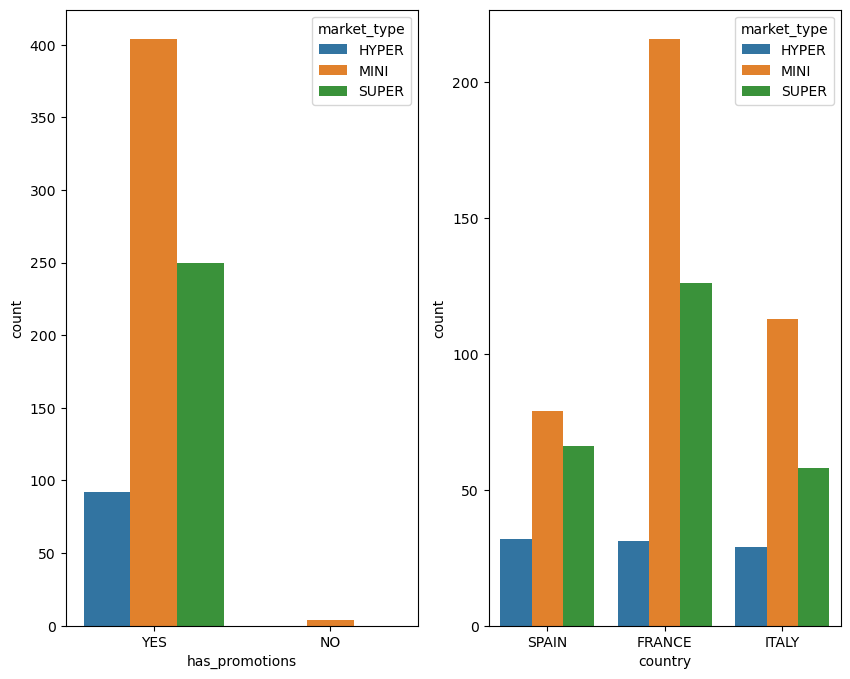

In [50]:
meaningfull_col = ['has_promotions', 'country']

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 8))
index = 0
ax = ax.flatten()
for col in meaningfull_col:
    sns.countplot(x=col, hue="market_type", data=merged_df, ax=ax[index])
    index += 1

It is evident that the majority of stores has promotions, independently of the type. We can also notice that the majority of markets are located in France which may lead to an higher correlation to it.

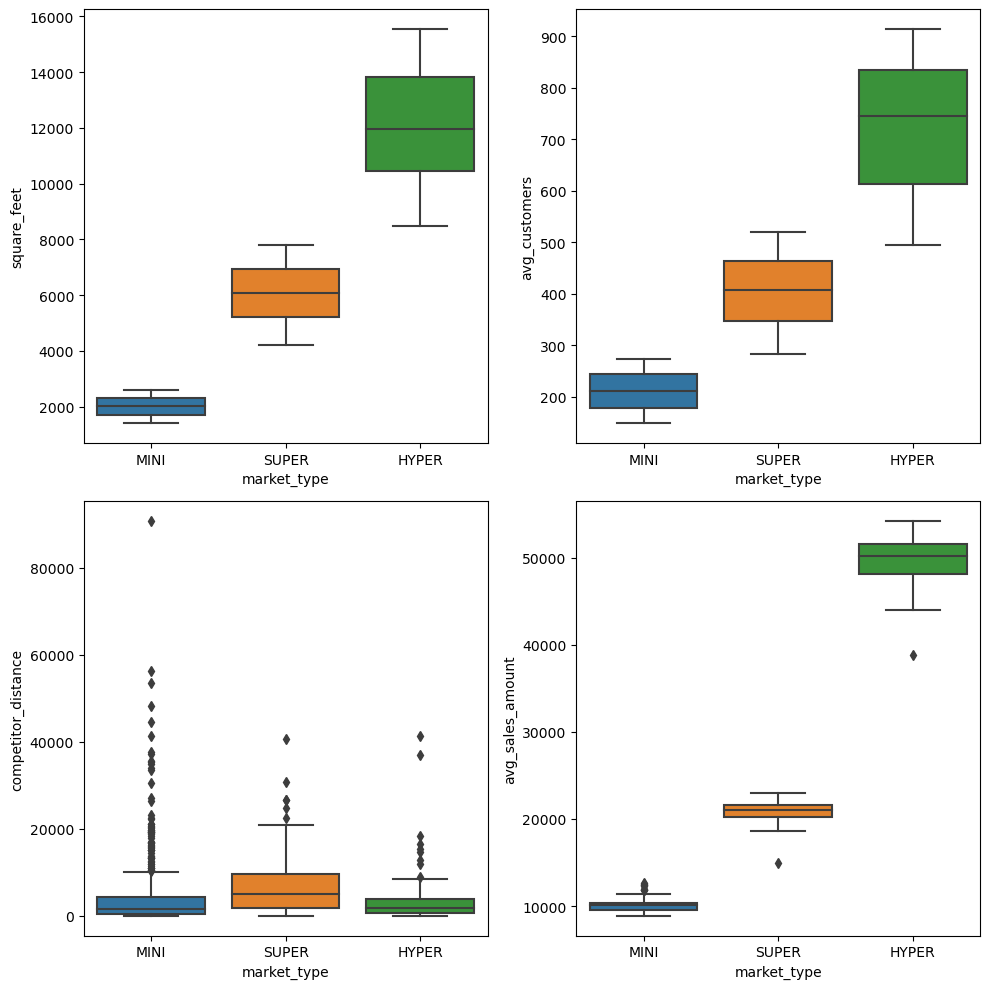

In [51]:
#boxplot outlier market_type versus the others

Col_to_see=merged_df[['market_type', 'square_feet', 'avg_customers',
       'competitor_distance', 'avg_sales_amount']]

fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize = (10,10))

index = 0
ax = ax.flatten()
for k, v in Col_to_see.items():
  if k != "market_type":
    sns.boxplot(x="market_type", y=k, data=Col_to_see, ax=ax[index], order= ['MINI', 'SUPER', 'HYPER'])
    index +=1
plt.tight_layout()

Plotting the column 'market_type' agaist all the others we see that the three types of market are well divided according to 'square_feet', 'avg_customers' and 'avg_sales_amount', meaning that there is a relation between size, number of clients and types that well classify the markets.\
Regarding 'competitors_distance', it seems absent a correlation between the type of the market and this variable. However we can notice that there are many outliers in this case.

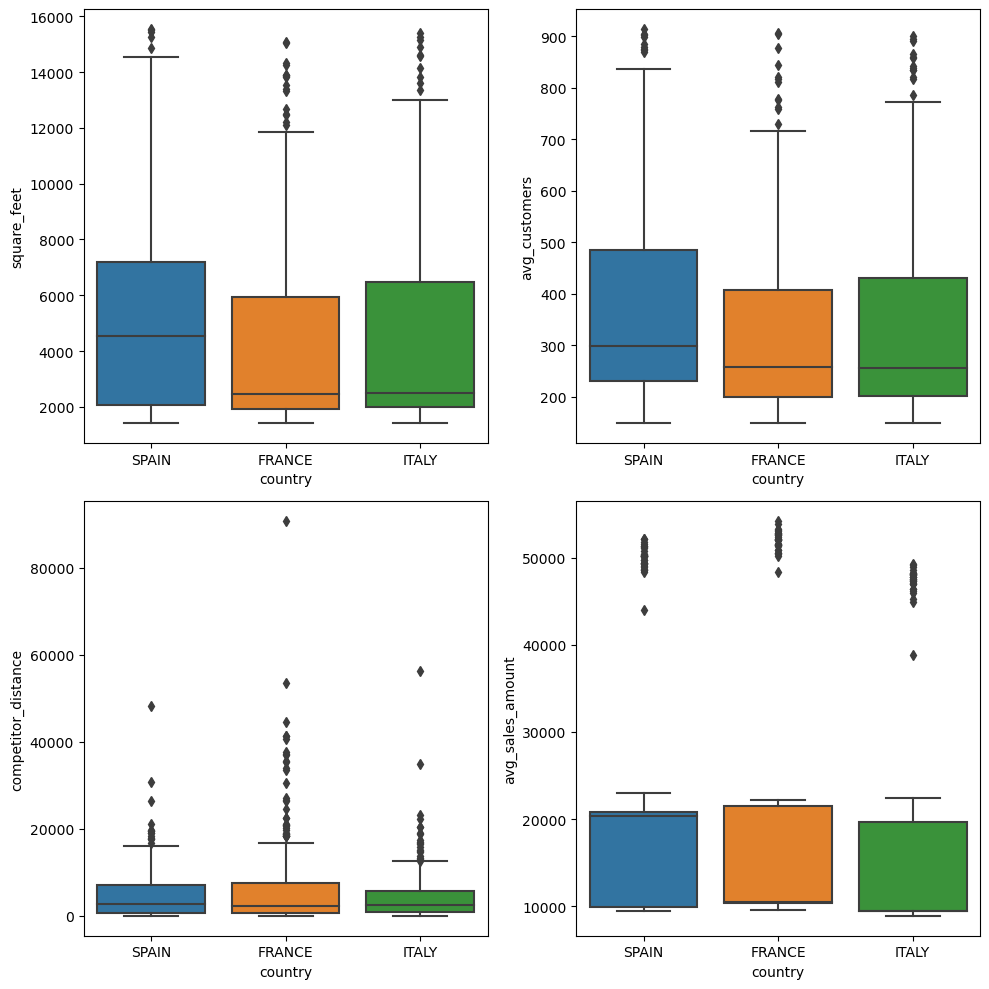

In [52]:
#boxplot outlier country versus the others

Col_to_see2 = merged_df[['country','square_feet', 'avg_customers',
       'competitor_distance', 'avg_sales_amount']]

fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize = (10,10))

index = -1
ax = ax.flatten()
for k, v in Col_to_see2.items():
  if k != "country":
    sns.boxplot(x="country", y=k, data=Col_to_see2 , ax=ax[index])
  index +=1
plt.tight_layout()

Dividing the market accorging to their location, we cannot observe huge differences between them: Spain has larger stores and in average more costumers, while in Italy the sales are less in average but overall they are equivalent.\
Now we want to focus on the outliers.

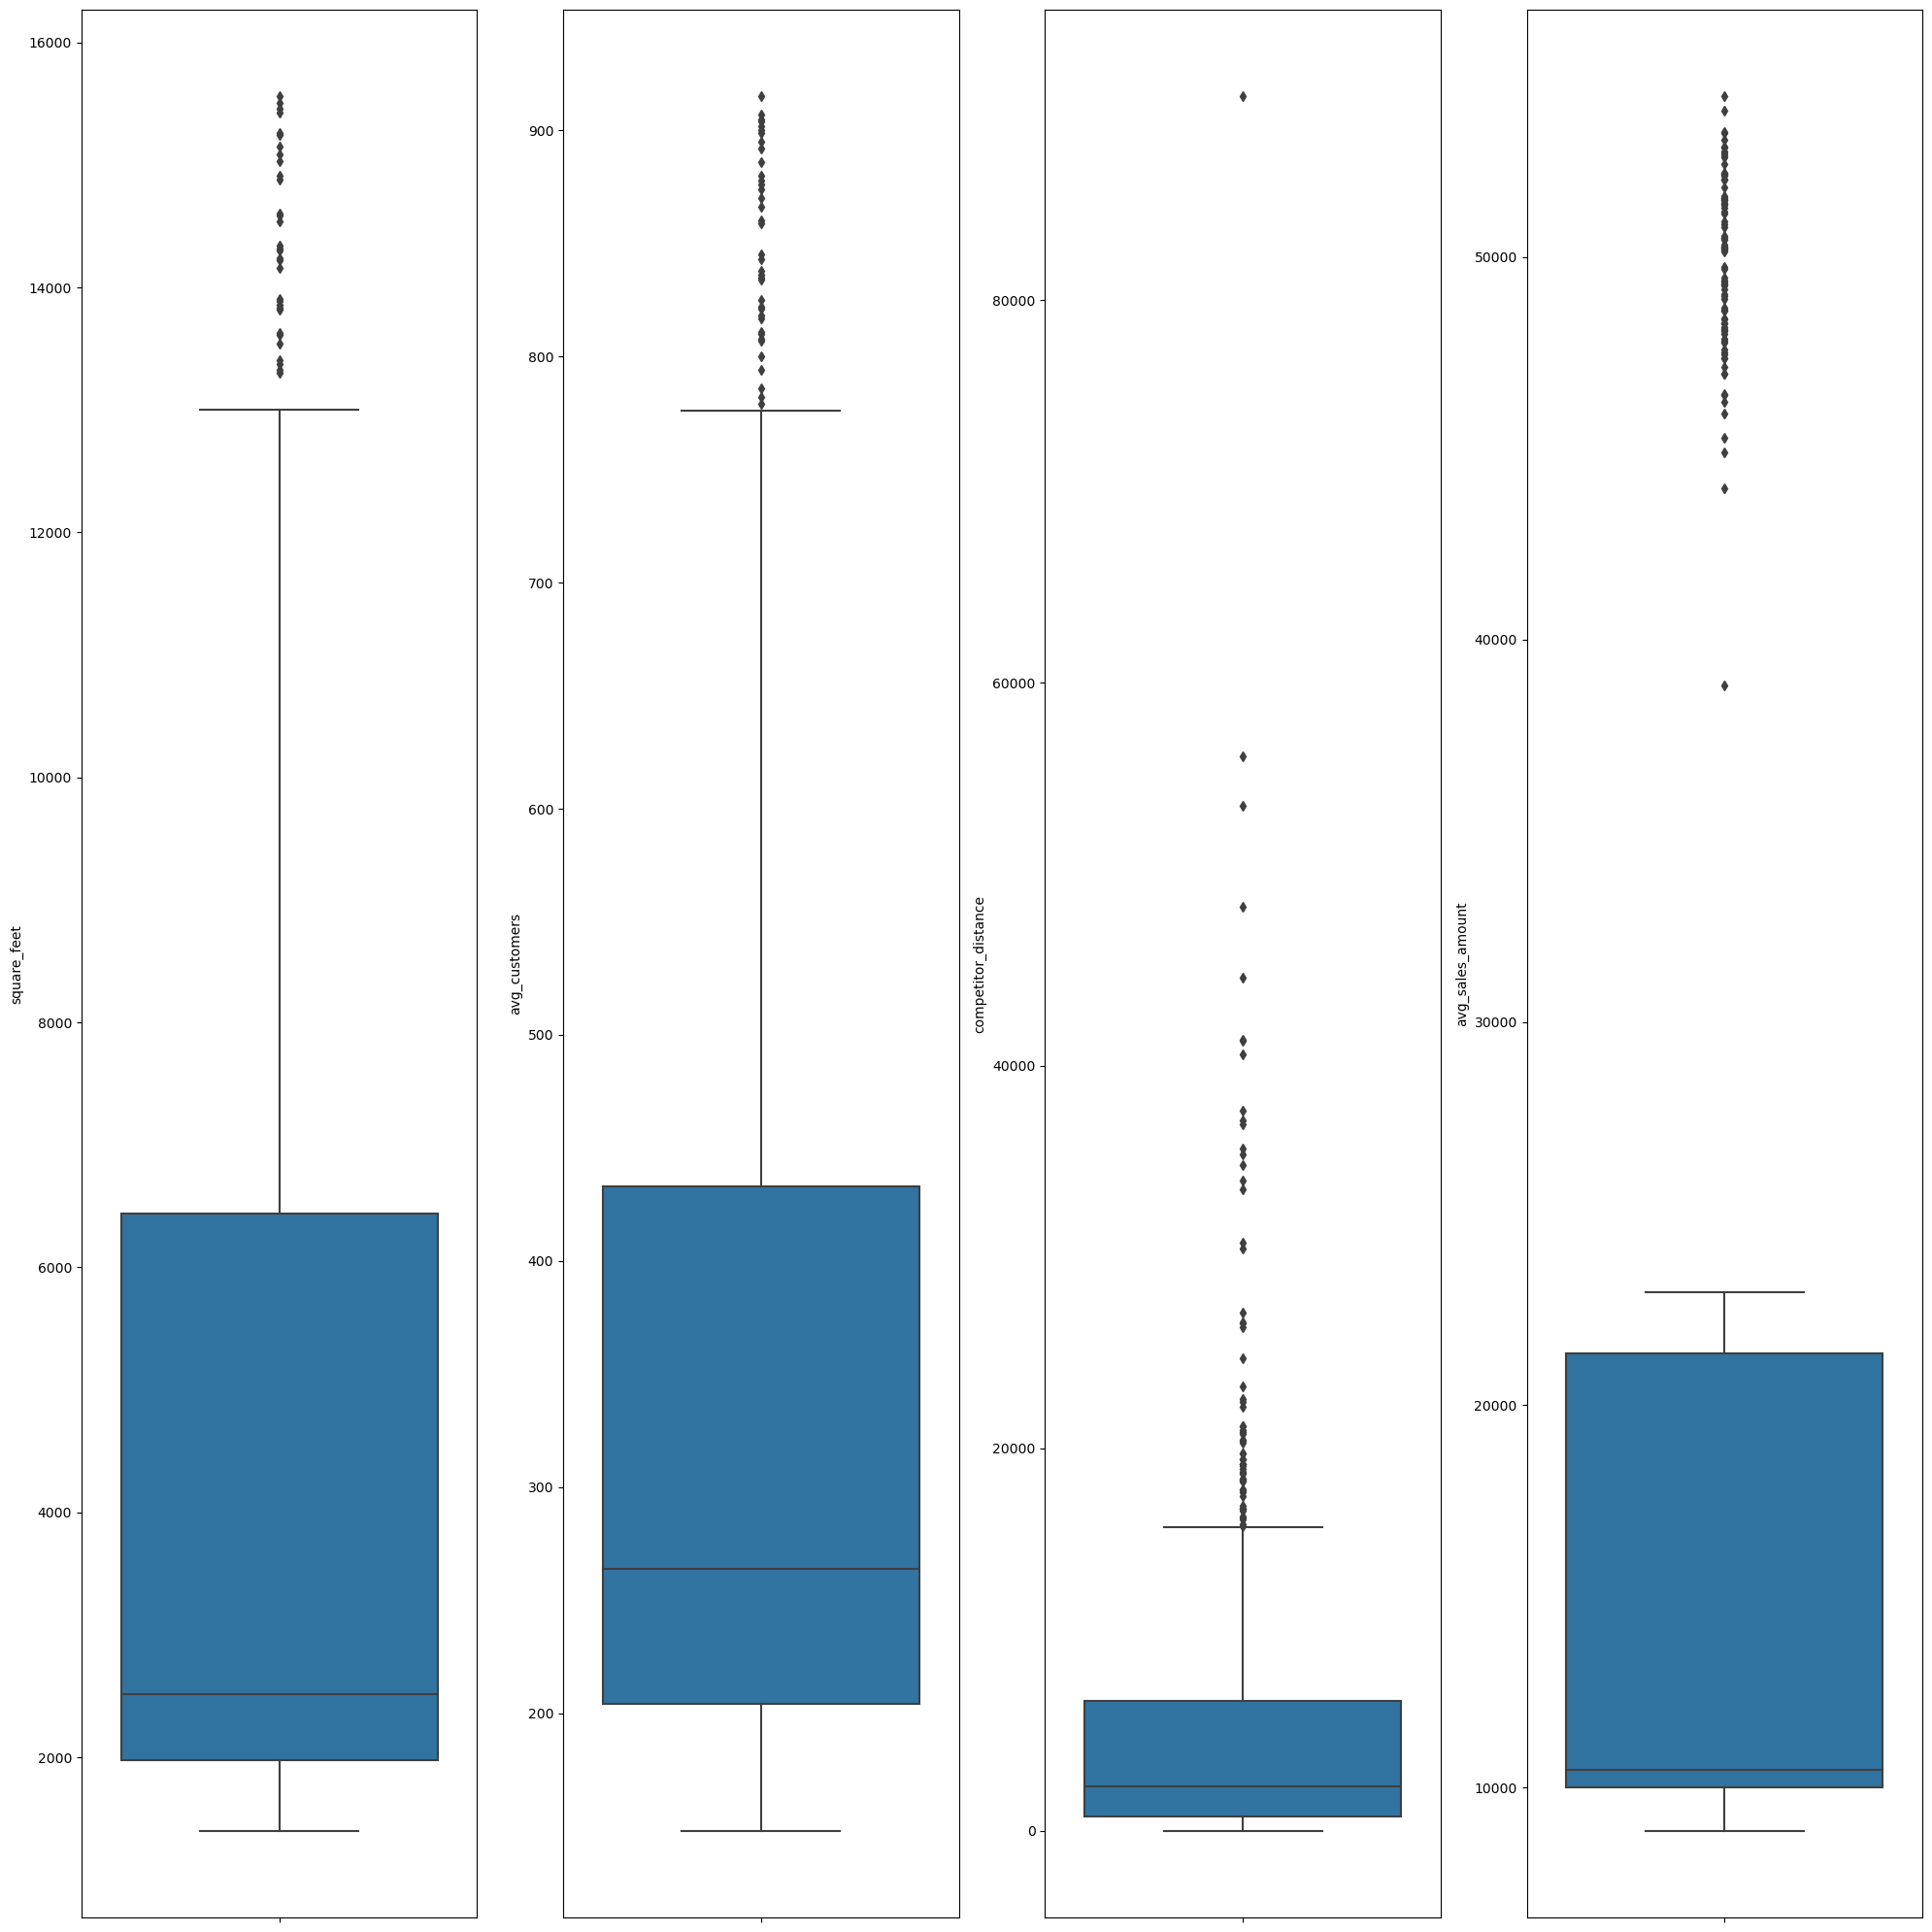

In [53]:
Col_to_see3=merged_df[['square_feet', 'avg_customers',
       'competitor_distance', 'avg_sales_amount']]

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 20))
index = 0
ax = ax.flatten()
for k, v in Col_to_see3.items():
    sns.boxplot(y= k , data=Col_to_see3, ax=ax[index])
    index +=1
plt.tight_layout()

It seems that there are many outlier, we compute the percentage to have a better understanding. First we will consider all the data set and, as a second step, we divide accorging to the market type.

In [54]:
#All the data set
for k, v in Col_to_see.items():
  if k != "market_type":
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    outliers_v = v[(v <= q1 - 1.5*iqr) | (v >= q3 + 1.5*iqr)]
    print(f"The column {k} has {round(len(outliers_v)/len(v) * 100, 2)}%")

The column square_feet has 4.27%
The column avg_customers has 5.07%
The column competitor_distance has 8.8%
The column avg_sales_amount has 12.27%


Now we divide for type of market.

In [55]:
mini_df=merged_df[merged_df['market_type']=='MINI']
mini_df

,id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions,avg_sales_amount
1,WG25,FRANCE,MINI,1402,252,522,YES,10418.686479
2,UX72,FRANCE,MINI,1452,265,15939,YES,10201.225137
4,RF54,FRANCE,MINI,2497,191,34007,YES,9983.017178
5,ZU61,FRANCE,MINI,1507,162,247,YES,10272.053370
6,MY79,FRANCE,MINI,1582,217,20274,YES,10268.863699
...,...,...,...,...,...,...,...,...
736,AK95,FRANCE,MINI,1910,165,81,YES,10324.503233
742,MK57,ITALY,MINI,1870,154,5777,YES,9273.840110
743,YG20,SPAIN,MINI,1541,272,1161,YES,9504.235696
744,SY41,ITALY,MINI,2530,148,15859,YES,9229.782562


In [56]:
col_mini=mini_df[[ 'market_type', 'square_feet', 'avg_customers',
       'competitor_distance', 'avg_sales_amount']]
for k, v in col_mini.items():
  if k != "market_type":
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    outliers_v = v[(v <= q1 - 1.5*iqr) | (v >= q3 + 1.5*iqr)]
    print(f"The column {k} has {round(len(outliers_v)/len(v) * 100, 2)}%")

The column square_feet has 0.0%
The column avg_customers has 0.0%
The column competitor_distance has 15.2%
The column avg_sales_amount has 2.21%


In [57]:
super_df=merged_df[merged_df['market_type']=='SUPER']

col_super=super_df[[ 'market_type', 'square_feet', 'avg_customers',
       'competitor_distance', 'avg_sales_amount']]#       'avg_opening']]

for k, v in col_super.items():
  if k != "market_type":
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    outliers_v = v[(v <= q1 - 1.5*iqr) | (v >= q3 + 1.5*iqr)]
    print(f"The column {k} has {round(len(outliers_v)/len(v) * 100, 2)}%")

The column square_feet has 0.0%
The column avg_customers has 0.0%
The column competitor_distance has 2.4%
The column avg_sales_amount has 0.4%


In [58]:
hyper_df=merged_df[merged_df['market_type']=='HYPER']
col_hyper=hyper_df[[ 'market_type', 'square_feet', 'avg_customers',
       'competitor_distance', 'avg_sales_amount']] #       'avg_opening']]

for k, v in col_hyper.items():
  if k != "market_type":
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    outliers_v = v[(v <= q1 - 1.5*iqr) | (v >= q3 + 1.5*iqr)]
    print(f"The column {k} has {round(len(outliers_v)/len(v) * 100, 2)}%")

The column square_feet has 0.0%
The column avg_customers has 0.0%
The column competitor_distance has 9.78%
The column avg_sales_amount has 1.09%


The complete data frame appears to have an high number of outliers but when we split in three subclasses, it is evident that the majority of outliers are relater to the *distance to competitors*. We already underlined that in this column are present elements which may have different interpretations. Due to che fact that the countries considered are made also by islands and city between mountains, it may make sense to have stores far away from each the others. To corroborate these considerations, lets see the scatterplot.

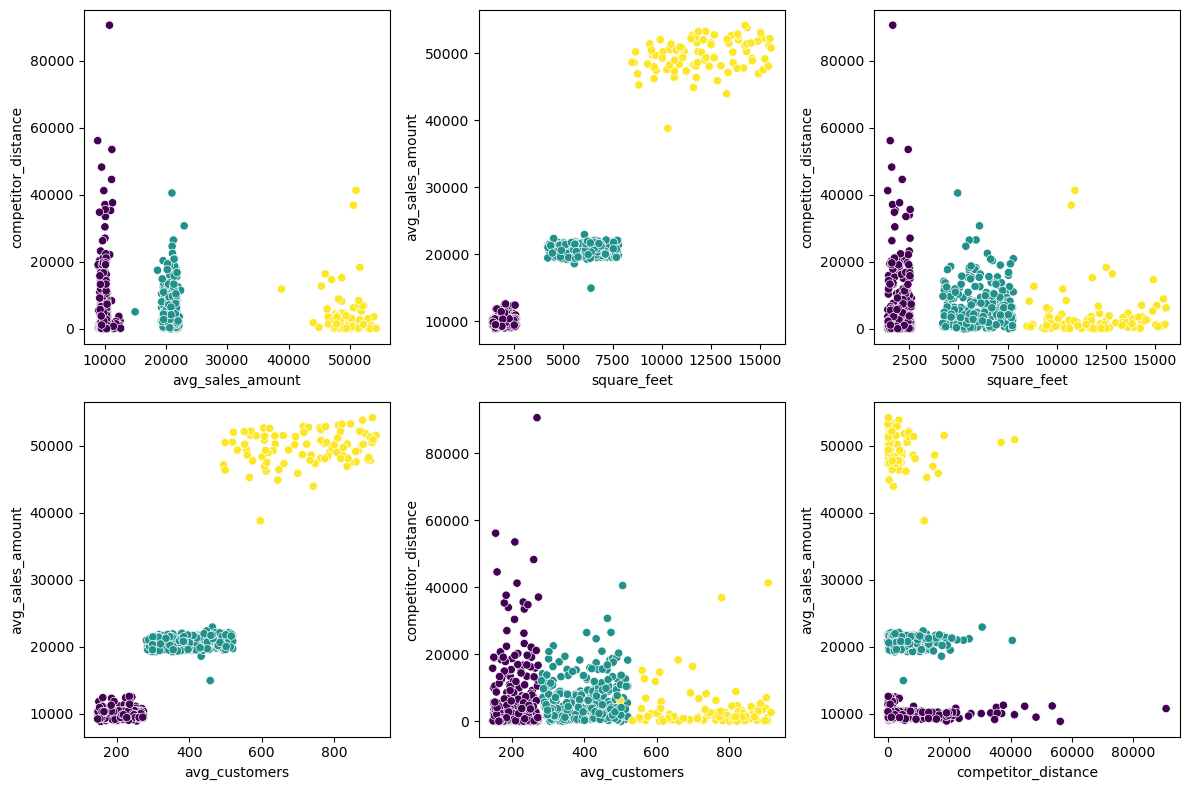

In [59]:
#scatterplot on merged_df
m1=merged_df[["avg_sales_amount","square_feet","avg_customers","competitor_distance"]]

fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(12,8))
index=0
ax=ax.flatten()
color = merged_df.loc[:, "market_type"].map(dict({"HYPER": 2, "SUPER": 1, "MINI": 0 })).tolist()

for k, v in m1.items():
     if k!="avg_sales_amount":
        sns.scatterplot(x=k,y="avg_sales_amount",data=m1,ax=ax[index], c=color )
        index+=1
     if k != "competitor_distance":
        sns.scatterplot(x=k, y= "competitor_distance", data= m1, ax=ax[index], c=color)
        index +=1
plt.tight_layout()

### Encoding categorical variables in merged_df

We need now to encode categorical variables. First step, we consider the column 'country' and we use the function '*get_dummies*'.

In [60]:
country_df= pd.get_dummies(merged_df['country'], drop_first=True)
merged_df=merged_df.drop(columns= 'country')
merged_df=pd.concat([merged_df, country_df], axis=1)

Now we change the values inside the column 'has_promotion' using the function '*map*' and mapping 'NO' into 0 and 'YES' into 1.

In [61]:
merged_df['has_promotions']=merged_df['has_promotions'].map({'NO': 0, 'YES': 1})

Finally we change the column 'market_type', using again the function '*get_dummies*'.




In [62]:
market_type_df= pd.get_dummies(merged_df['market_type'], drop_first=True)
merged_df=merged_df.drop(columns= 'market_type')
merged_df=pd.concat([merged_df, market_type_df], axis=1)

merged_df

,id,square_feet,avg_customers,competitor_distance,has_promotions,avg_sales_amount,ITALY,SPAIN,MINI,SUPER
0,XC14,11135,773,515,1,50309.539233,0,1,0,0
1,WG25,1402,252,522,1,10418.686479,0,0,1,0
2,UX72,1452,265,15939,1,10201.225137,0,0,1,0
3,EE84,15259,874,754,1,52161.938041,0,1,0,0
4,RF54,2497,191,34007,1,9983.017178,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
745,ZM74,5778,356,4424,1,19577.509603,1,0,0,1
746,WW60,10923,907,41359,1,50924.988233,0,0,0,0
747,LU14,5742,397,2841,1,19612.729329,1,0,0,1
748,HY57,2495,228,3848,1,9446.582438,1,0,1,0


## Linear Regression

In this section we will use the column 'avg_sales_amount' as a target and all the others as predictors. The first step is to use a multiple linear regression to analyze how a change of one unit of the predictors changes the target variable. Afterwards we will implement a features selection to see in the increments of the average sales are influenced differently in the case in with we do not consider all the predictors.

We now run the **multiple linear regression** on the data frame 'merged_df'.\
We define a function **Multi_LinearRegression(X, y)** in order to recall it later. Notice that this definition contains:


*   Splitting of tha data between train and test
*   Application of the OLS model
*   Summary of the estimated coefficient
*   Computation of the errors

> $ MSE= \frac{1}{n} \sum_{i=1}^n (y_i - \hat y_i)^2 $


> $R^2= 1- \frac{RSS}{TSS}$


> $ RSE= \sqrt { \frac{1}{n-p-1} \sum_{i=1}^n (y_i - \hat y_i)^2}$

In the next steps we analyze also correlation, variance, heteroscendacity and collinearity.

In [63]:
def Multi_LinearRegression(X, y):
  # split between X_train, X_test, y_train, y_test
  global X_train
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

  # Add a constant for the intercept to both training and test data
  global X_train_with_intercept
  X_train_with_intercept = sm.add_constant(X_train)
  X_test_with_intercept = sm.add_constant(X_test)

  # Fit the linear regression model
  global model_LR
  model_LR = sm.OLS(y_train, X_train_with_intercept).fit()

  # coefficient estimates
  coefficients = model_LR.params

  # let's create a dataframe with all coefficients and stats of interest
  rows = []
  for index, value in coefficients.items():
    row = [index, value, model_LR.bse[index], model_LR.tvalues[index], model_LR.pvalues[index]]
    rows.append(row)

  summary_coeff = pd.DataFrame(rows, columns=["", "OLS estimation", "SE", "t-stats", "p-value"])
  print('----------------------- summary coefficients ---------------------------')
  print(summary_coeff)
  print()

  # 95% confidence intervals

  print('--------------------- confidence intervals --------------------')
  confidence_intervals = model_LR.conf_int(alpha=0.05)  # 95% confidence interval


  for index, value in coefficients.items():
    conf_int_tmp = confidence_intervals.loc[index].values
    print(f"The 95% confidence interval for {index} is {conf_int_tmp}")

  # model accuracy

  y_pred = model_LR.predict(X_test_with_intercept)

  # RSE
  residuals = y_pred - y_test
  RSE = (sum(residuals ** 2) / (len(residuals) - X.shape[1] - 1)) ** 0.5

  # R2
  R2 = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

  # MSE
  global MSE
  MSE = round(((y_test - y_pred) ** 2).mean(),2)

  print()

  print('------------------------- Errors --------------------------------------------')

  print(f"The RSE is {round(RSE, 2)}, the R2 is {round(R2, 2)} and the MSE is {round(MSE, 2)}")

### Regression merged_df

In [64]:
merged_df

,id,square_feet,avg_customers,competitor_distance,has_promotions,avg_sales_amount,ITALY,SPAIN,MINI,SUPER
0,XC14,11135,773,515,1,50309.539233,0,1,0,0
1,WG25,1402,252,522,1,10418.686479,0,0,1,0
2,UX72,1452,265,15939,1,10201.225137,0,0,1,0
3,EE84,15259,874,754,1,52161.938041,0,1,0,0
4,RF54,2497,191,34007,1,9983.017178,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
745,ZM74,5778,356,4424,1,19577.509603,1,0,0,1
746,WW60,10923,907,41359,1,50924.988233,0,0,0,0
747,LU14,5742,397,2841,1,19612.729329,1,0,0,1
748,HY57,2495,228,3848,1,9446.582438,1,0,1,0


In [65]:
merged_df = merged_df.drop('id', axis=1) #we need to remove the first column
#split the data
X_mer = merged_df.loc[:, merged_df.columns != 'avg_sales_amount']
y_mer = merged_df['avg_sales_amount']

In [66]:
Multi_LinearRegression(X_mer, y_mer)

----------------------- summary coefficients ---------------------------
                        OLS estimation          SE    t-stats        p-value
0                const    45762.405669  799.524731  57.237011  3.050529e-243
1          square_feet        0.205983    0.034148   6.032055   2.855697e-09
2        avg_customers        2.973314    0.515965   5.762629   1.333927e-08
3  competitor_distance       -0.009592    0.003870  -2.478331   1.347798e-02
4       has_promotions       94.659689  569.181793   0.166308   8.679712e-01
5                ITALY    -1682.991861   77.731745 -21.651281   5.562490e-77
6                SPAIN     -742.187906   84.809794  -8.751205   2.204694e-17
7                 MINI   -36166.700337  443.359163 -81.574271  9.881313e-324
8                SUPER   -26829.280494  287.359506 -93.364862   0.000000e+00

--------------------- confidence intervals --------------------
The 95% confidence interval for const is [44192.15023236 47332.66110549]
The 95% confidence 

The first result that we see and maybe it is also the most meaningful is $R^2=1$. This would means a perfect fitting of the model which in practice cannot be reached so easly. Supposing we are in a case of overfittig, we split according to the market type and then analyze the delta changes.

### Mini

In [67]:
mini_df

,id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions,avg_sales_amount
1,WG25,FRANCE,MINI,1402,252,522,YES,10418.686479
2,UX72,FRANCE,MINI,1452,265,15939,YES,10201.225137
4,RF54,FRANCE,MINI,2497,191,34007,YES,9983.017178
5,ZU61,FRANCE,MINI,1507,162,247,YES,10272.053370
6,MY79,FRANCE,MINI,1582,217,20274,YES,10268.863699
...,...,...,...,...,...,...,...,...
736,AK95,FRANCE,MINI,1910,165,81,YES,10324.503233
742,MK57,ITALY,MINI,1870,154,5777,YES,9273.840110
743,YG20,SPAIN,MINI,1541,272,1161,YES,9504.235696
744,SY41,ITALY,MINI,2530,148,15859,YES,9229.782562


In [68]:
#encoding categorical variable
mini_df['has_promotions'] = mini_df['has_promotions'].map({'YES': 1, 'NO': 0})

country_df= pd.get_dummies(mini_df['country'], drop_first=True)
mini_df=mini_df.drop(columns= 'country')
mini_df=pd.concat([mini_df, country_df], axis=1)
print('---------------mini data frame with encoding is:----------------')
print(mini_df)

mini_df_2= mini_df.drop(columns=['id' , 'market_type'])

---------------mini data frame with encoding is:----------------
       id market_type  square_feet  avg_customers  competitor_distance  \
1    WG25        MINI         1402            252                  522   
2    UX72        MINI         1452            265                15939   
4    RF54        MINI         2497            191                34007   
5    ZU61        MINI         1507            162                  247   
6    MY79        MINI         1582            217                20274   
..    ...         ...          ...            ...                  ...   
736  AK95        MINI         1910            165                   81   
742  MK57        MINI         1870            154                 5777   
743  YG20        MINI         1541            272                 1161   
744  SY41        MINI         2530            148                15859   
748  HY57        MINI         2495            228                 3848   

     has_promotions  avg_sales_amount  ITALY  

C:\Users\franc\AppData\Local\Temp\ipykernel_16328\1077392235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['has_promotions'] = mini_df['has_promotions'].map({'YES': 1, 'NO': 0})


In [69]:
X_mini = mini_df_2.loc[:, mini_df_2.columns != 'avg_sales_amount']
y_mini = mini_df_2["avg_sales_amount"]

Multi_LinearRegression(X_mini, y_mini)
MSE_LR_mini =  MSE

----------------------- summary coefficients ---------------------------
                        OLS estimation          SE    t-stats       p-value
0                const     9811.260688  416.602745  23.550639  9.125537e-72
1          square_feet        0.111790    0.059217   1.887821  5.995738e-02
2        avg_customers        1.206977    0.551958   2.186719  2.948913e-02
3  competitor_distance       -0.003992    0.002335  -1.709603  8.831171e-02
4       has_promotions       94.942412  376.680911   0.252050  8.011648e-01
5                ITALY     -901.601820   48.335717 -18.652911  5.052040e-53
6                SPAIN     -412.499041   54.582883  -7.557297  4.396720e-13

--------------------- confidence intervals --------------------
The 95% confidence interval for const is [ 8991.62462119 10630.89675493]
The 95% confidence interval for square_feet is [-0.00471406  0.22829462]
The 95% confidence interval for avg_customers is [0.121039  2.2929151]
The 95% confidence interval for compe

Here the $R^2$ error is 0.42, which is more realistic because this means that the proportion of variance explained is equal to 42%. The MSE is approximately equal to $497^2$ while RSE= 518.9, which gives a standard deviation-like measure of how spread out the errors are, so this is a good approximation in this sense. The delta changes for this data set are expressed from the first column of the *summary coefficient*. Looking at the p-values, we can see that Italy and Spain have a good approximation (the p-value is far from zero and not close to 0.02). On the other side, the p-values of competitor-distance, avg_costumers and square_feet are more close to 0.05 so OLS estimation is not as good as for the others. We also see that the square_feet and competitor_distance confidence intervalls contain the zero.\
Regarding the delta changes for this data set we can see that for a one unit increase of **square_feet** the average sales amount increases of approximately 0.11. A more significative increment of the sales is due to an increase of 1 uniti of **avg_customers** which lead to an improvement of 1.2. On the other hand, an increasing of 1 unit of **competitor_distance** will give a decrease of 0.004 of the sales.

Text(0, 0.5, 'Training residuals')

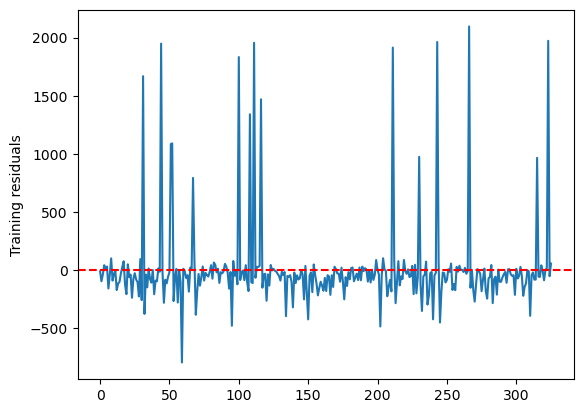

In [70]:
# 1. correlation of error terms
plt.figure()
residuals_training = model_LR.resid #residuals from training data
plt.plot(range(0, len(residuals_training)), residuals_training)
plt.axhline(y=0, color="red", linestyle="--")
plt.ylabel("Training residuals")

In [71]:
# autocorrelation
lagged_residuals = residuals_training.shift(1)  # Lagged residuals
autocorrelation = (residuals_training.corr(lagged_residuals)) ** 2

# durbin_watson
durbin_watson = sm.stats.durbin_watson(residuals_training)
print(f"The autocorrelation is {round(autocorrelation, 5)} while the durbing watson statistic is {round(durbin_watson, 5)}")

The autocorrelation is 0.00043 while the durbing watson statistic is 2.0412


Since the autocorrelation is 0.00043 (close to zero) and the Watson statistic is 2.0412 (close to 2), we can say that there is no correlation.

Text(0, 0.5, 'Training residuals')

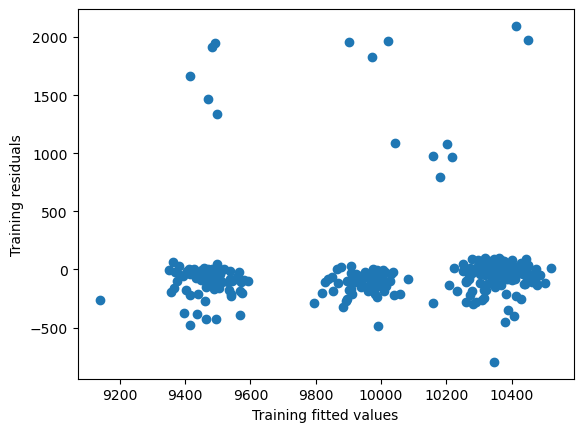

In [72]:
# 2. Variance of error term
# let's first plot residuals vs fitted values
plt.scatter(model_LR.predict(X_train_with_intercept), residuals_training)
plt.xlabel("Training fitted values")
plt.ylabel("Training residuals")

In [73]:
#breusch pagan test
name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(residuals_training, model_LR.model.exog)
print(lzip(name, test))

[('Lagrange multiplier statistic', 4.1304627565570495), ('p-value', 0.6590263607953397)]


In this case we see that the p-value for the Breusch Pagar test is 0.66. Since it is greater than 0.05 we cannot reject the null hypotesis and we are in the case of homoscendasticity.

In [74]:
# 3. Collinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["Feature"] = X_train.columns
print(vif)

   VIF Factor              Feature
0   29.193562          square_feet
1   30.971124        avg_customers
2    1.314982  competitor_distance
3   61.241303       has_promotions
4    1.556950                ITALY
5    1.376929                SPAIN


The VIF factor of ITALY, SPAIN and competitor_distance is really close to the minimum possible (1). This suggerst that they will not be revoved in a future features selection. On the other side, has_promotion has a really high valuewith respect to the others, so maybe is the one that has higher probability of not being selected.

### Super regression

In [75]:
#encoding categorical variable
super_df['has_promotions'] = super_df['has_promotions'].map({'YES': 1, 'NO': 0})

country_df= pd.get_dummies(super_df['country'], drop_first=True)
super_df=super_df.drop(columns= 'country')
super_df=pd.concat([super_df, country_df], axis=1)

print('---------------super data frame with encoding is:----------------')
print(super_df)

super_df_2= super_df.drop(columns=['id', 'market_type'])

---------------super data frame with encoding is:----------------
       id market_type  square_feet  avg_customers  competitor_distance  \
12   GR52       SUPER         6620            467                  293   
14   AQ56       SUPER         4514            510                 3529   
17   TD84       SUPER         4617            460                11522   
19   DS94       SUPER         5232            356                 2245   
22   GU36       SUPER         7412            446                 3930   
..    ...         ...          ...            ...                  ...   
740  LA59       SUPER         6366            460                 9903   
741  BW89       SUPER         7539            384                 4225   
745  ZM74       SUPER         5778            356                 4424   
747  LU14       SUPER         5742            397                 2841   
749  QD17       SUPER         6806            516                10468   

     has_promotions  avg_sales_amount  ITALY 

C:\Users\franc\AppData\Local\Temp\ipykernel_16328\817912258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_df['has_promotions'] = super_df['has_promotions'].map({'YES': 1, 'NO': 0})


In [76]:
X_super = super_df_2.loc[:, super_df_2.columns != 'avg_sales_amount']
y_super = super_df_2["avg_sales_amount"]

Multi_LinearRegression(X_super, y_super)
MSE_LR_super =  MSE
model_LR_super= model_LR

----------------------- summary coefficients ---------------------------
                        OLS estimation          SE    t-stats        p-value
0          square_feet        0.096008    0.031121   3.085014   2.332681e-03
1        avg_customers        2.049874    0.470890   4.353193   2.169107e-05
2  competitor_distance       -0.010367    0.005322  -1.948062   5.285030e-02
3       has_promotions    20214.654868  283.070814  71.412007  3.004811e-141
4                ITALY    -1988.402913   82.602011 -24.072088   3.609497e-60
5                SPAIN     -923.356991   78.190008 -11.809143   1.335973e-24

--------------------- confidence intervals --------------------
The 95% confidence interval for square_feet is [0.03462948 0.15738628]
The 95% confidence interval for avg_customers is [1.12115343 2.97859468]
The 95% confidence interval for competitor_distance is [-0.02086282  0.00012882]
The 95% confidence interval for has_promotions is [19656.36349316 20772.94624374]
The 95% confiden

The $R^2$ error is 0.96 which is really good and also MSE and RSE are pretty good ($169^2$ and 178.9 respectively). As before the changes of one unit in the predictor can be observed in the column OLS estimation of the *summary coefficient* table above. We can observe that a change of 1 unit for **square_feet** gives an increasing in the sales of 0.096 and we have an increasing also in the case of a change for **avg_customers** (the increment is 2.05). The predictor **competitor_distance** returns a decreasing of 0.01 however the only coefficient with value greater than 0.05 is competitor_distance, meaning that it does not have significant effect on the prediction. This has also evidence in the fact that its confidence contains zero. All the others have a p-value less than 0.05 and in many cases also far from zero, suggesting that their contribution is important. For example consider square_feet and avg_customers.

Text(0, 0.5, 'Training residuals')

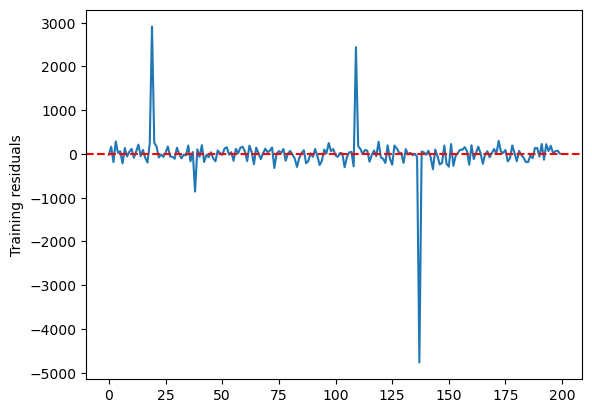

In [77]:
# 1. correlation of error terms
plt.figure()
residuals_training = model_LR.resid #residuals from training data
plt.plot(range(0, len(residuals_training)), residuals_training)
plt.axhline(y=0, color="red", linestyle="--")
plt.ylabel("Training residuals")

In [78]:
# autocorrelation
lagged_residuals = residuals_training.shift(1)  # Lagged residuals
autocorrelation = (residuals_training.corr(lagged_residuals)) ** 2

# durbin_watson
durbin_watson = sm.stats.durbin_watson(residuals_training)
print(f"The autocorrelation is {round(autocorrelation, 5)} while the durbing watson statistic is {round(durbin_watson, 5)}")

The autocorrelation is 0.00026 while the durbing watson statistic is 1.96781


Since the autocorrelation is 0.00026 (close to the optimal value 0) and the durbing watson statistic is 1.9678 (close to the optimal value 2), we can conclude that there is no correlation.

Text(0, 0.5, 'Training residuals')

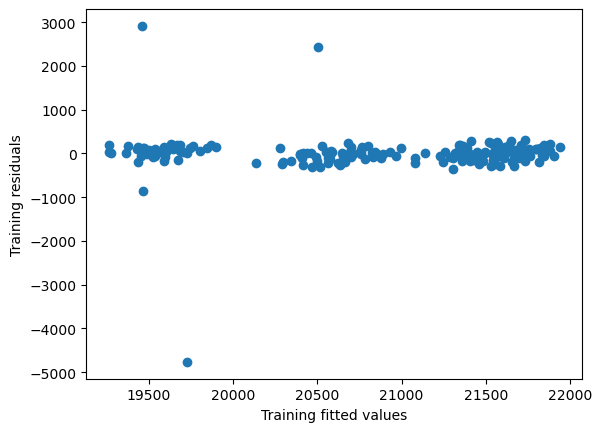

In [79]:
# 2. Variance of error term
# let's first plot residuals vs fitted values
plt.scatter(model_LR.predict(X_train_with_intercept), residuals_training)
plt.xlabel("Training fitted values")
plt.ylabel("Training residuals")

In [80]:
#breusch pagan test
name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(residuals_training, model_LR.model.exog)
print(lzip(name, test))

[('Lagrange multiplier statistic', 7.872215574188601), ('p-value', 0.16342011357220493)]


The p-value deriving from the Breusch Pagar test is 0.16 (greater than 0.05), hence we cannot reject the null hypotesis and we are in the case of homoscendasticity.

In [81]:
# 3. Collinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["Feature"] = X_train.columns
print(vif)

   VIF Factor              Feature
0    1.009313          square_feet
1    1.010134        avg_customers
2    1.010606  competitor_distance
3   74.876766       has_promotions
4    1.129163                ITALY
5    1.126020                SPAIN


All the value are really close to 1, which is the minimun for the VIF factor, except for has_promotions(74.9). We can say that the collinearity is very small and maybe we should remove has_promotions for the next step.

### Hyper regression


In [82]:
#encoding categorical variable
hyper_df['has_promotions'] = hyper_df['has_promotions'].map({'YES': 1, 'NO': 0})

country_df= pd.get_dummies(hyper_df['country'], drop_first=True)
hyper_df=hyper_df.drop(columns= 'country')
hyper_df=pd.concat([hyper_df, country_df], axis=1)
print('---------------hyper data frame with encoding is:----------------')
print(hyper_df)

hyper_df_2= hyper_df.drop(columns=['id', 'market_type'])

---------------hyper data frame with encoding is:----------------
       id market_type  square_feet  avg_customers  competitor_distance  \
0    XC14       HYPER        11135            773                  515   
3    EE84       HYPER        15259            874                  754   
20   FQ59       HYPER        11874            836                  411   
24   DT31       HYPER        11608            644                  474   
33   QW96       HYPER        14589            866                 2687   
..    ...         ...          ...            ...                  ...   
718  PA95       HYPER        15425            818                 8938   
728  KE80       HYPER        10474            693                 8494   
729  RS96       HYPER        13831            575                 1510   
735  FH31       HYPER        11488            817                 1385   
746  WW60       HYPER        10923            907                41359   

     has_promotions  avg_sales_amount  ITALY 

C:\Users\franc\AppData\Local\Temp\ipykernel_16328\1576401153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyper_df['has_promotions'] = hyper_df['has_promotions'].map({'YES': 1, 'NO': 0})


In [83]:
X_hyper = hyper_df_2.loc[:, hyper_df_2.columns != 'avg_sales_amount']
y_hyper = hyper_df_2["avg_sales_amount"]

Multi_LinearRegression(X_hyper, y_hyper)
MSE_LR_hyper =  MSE

----------------------- summary coefficients ---------------------------
                        OLS estimation          SE    t-stats       p-value
0          square_feet        0.335543    0.056461   5.942938  1.114459e-07
1        avg_customers        6.860556    1.023397   6.703706  5.117550e-09
2  competitor_distance       -0.074130    0.020718  -3.577996  6.491164e-04
3       has_promotions    43509.533894  970.272349  44.842599  1.065515e-51
4                ITALY    -5178.493381  293.014981 -17.673135  6.370892e-27
5                SPAIN    -2548.675647  307.129447  -8.298376  6.974657e-12

--------------------- confidence intervals --------------------
The 95% confidence interval for square_feet is [0.22284679 0.44823922]
The 95% confidence interval for avg_customers is [4.817846   8.90326564]
The 95% confidence interval for competitor_distance is [-0.11548381 -0.03277607]
The 95% confidence interval for has_promotions is [41572.86218001 45446.20560787]
The 95% confidence inte

Looking at the result, we get that $MSE= 1562^2$ and $RSE= 1964.58$, that we can say are good results. On the other side $R^2= 0.62$ says that we can explain approximately 62% of the variance, which is not bad at all. For seeing the delta changes, we consider the column *OLS estimation* as before. An increase of the sales is related to a delta change for the predictors **square_feet** and **avg_customers** (the increments are 0.34 and 6.86 respectively). A decresing on 0.074 is linked with the predictor **competitor_distance**. We see that all the p-values are less than 0.05 and none of the confidence intervals contains the zero. This imply that all of them has an important role if we have a change of one unit. In this case all the p_values are below 0.05.

Text(0, 0.5, 'Training residuals')

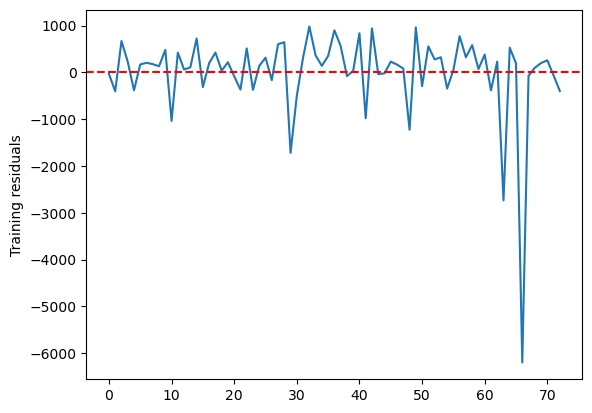

In [84]:
# 1. correlation of error terms
plt.figure()
residuals_training = model_LR.resid #residuals from training data
plt.plot(range(0, len(residuals_training)), residuals_training)
plt.axhline(y=0, color="red", linestyle="--")
plt.ylabel("Training residuals")

In [85]:
# autocorrelation
lagged_residuals = residuals_training.shift(1)  # Lagged residuals
autocorrelation = (residuals_training.corr(lagged_residuals)) ** 2

# durbin_watson
durbin_watson = sm.stats.durbin_watson(residuals_training)
print(f"The autocorrelation is {round(autocorrelation, 5)} while the durbing watson statistic is {round(durbin_watson, 5)}")

The autocorrelation is 0.00808 while the durbing watson statistic is 2.17706


The autocorrelation is 0.00808 (close to 0) while the durbing watson statistic is 2.17706 (pretty close to 2). We can conclude that there is no correlation.

Text(0, 0.5, 'Training residuals')

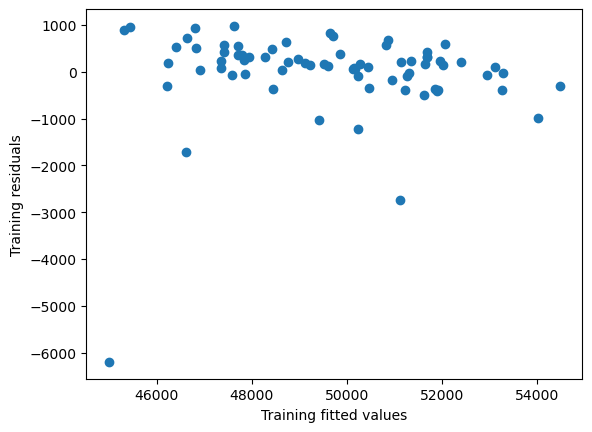

In [86]:
# 2. Variance of error term
# let's first plot residuals vs fitted values
plt.scatter(model_LR.predict(X_train_with_intercept), residuals_training)
plt.xlabel("Training fitted values")
plt.ylabel("Training residuals")

In [87]:
#breusch pagan test
name = ['Lagrange multiplier statistic', 'p-value']
test = sm.stats.het_breuschpagan(residuals_training, model_LR.model.exog)
print(lzip(name, test))

[('Lagrange multiplier statistic', 7.114362057447419), ('p-value', 0.21227305890121945)]


The p-value deriving from the Breusch Pagar test is 0.21 (greater than 0.05), hence we cannot reject the null hypotesis and there is indication of homoscendasticity.

In [88]:
# 3. Collinearity
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["Feature"] = X_train.columns
print(vif)

   VIF Factor              Feature
0    1.005050          square_feet
1    1.185955        avg_customers
2    1.020043  competitor_distance
3   71.826691       has_promotions
4    1.475074                ITALY
5    1.588192                SPAIN


All the value are really close to 1, which is the minimun for the VIF factor, except for has_promotions (71.8). We can say that the collinearity is very small and maybe we should remove has_promotions for the next step.

## Feature selection

First of all, we define the functions.

In [89]:
# Step 1: initialize KFold object to use for model evaluation
number_folds = 5
kf = KFold(n_splits=number_folds, shuffle=True, random_state=999)

In [90]:
 #Step 3: Define a function to calculate RSE, R2, and MSE
def calculate_metrics(y_validation, y_pred, X):
    residuals = y_validation - y_pred
    RSE = (sum(residuals ** 2) / (len(residuals) - X.shape[1] - 1)) ** 0.5
    R2 = 1 - (residuals ** 2).sum() / ((y_validation - y_validation.mean()) ** 2).sum()
    MSE = (residuals ** 2).mean()
    return RSE, R2, MSE

In [91]:
# Step 4: Implement best subset selection
def best_subset_selection(X, y, target_col):
    n_features = X.shape[1]
    all_models = []
    best_models = []
    best_metrics = {
        "RSE": float("inf"),
        "R2": -float("inf"),
        "MSE": float("inf"),
    }

    # for each number of features
    for k in range(1, n_features + 1):
        print(f"start iteration {k} of {n_features}")

        # for each combination of k number of features
        for combo in itertools.combinations(X.columns, k):
            model_features = list(combo)
            X_subset = X[model_features]

            # Add a constant for the intercept term
            X_subset = sm.add_constant(X_subset)
            # initialize empty array to store mse for each fold
            mse_folds = []

            # for each fold fit the model
            for train_idx, validation_idx in kf.split(X_subset):
                X_train, X_validation = X_subset.iloc[train_idx], X_subset.iloc[validation_idx]
                y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
                model = sm.OLS(y_train, X_train).fit()
                y_pred = model.predict(X_validation)

                RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X[model_features])
                mse_folds.append(MSE)
            # estimate test error using the mean of MSE in all folds
            test_error_estimated = sum(mse_folds) / len(mse_folds)
            # if the estimation of the test error is reduced, save metrics and model

            if test_error_estimated < best_metrics["MSE"]:
                best_metrics["RSE"] = RSE
                best_metrics["R2"] = R2
                best_metrics["MSE"] = test_error_estimated
                best_models = model_features
            # save number of features and estimated test error for plotting
            all_models.append([len(list(combo)), test_error_estimated])
      # coefficient estimates
    coefficients = model.params

    # let's create a dataframe with all coefficients and stats of interest
    rows = []
    for index, value in coefficients.items():
      row = [index, value, model.bse[index], model.tvalues[index], model.pvalues[index]]
      rows.append(row)

    summary_coeff = pd.DataFrame(rows, columns=["", "OLS estimation", "SE", "t-stats", "p-value"])
    print('----------------------- summary coefficients ---------------------------')
    print(summary_coeff)
    print()

    return best_models, best_metrics, all_models

In [92]:
#step 2
X = merged_df.loc[:,(~merged_df.columns.isin(['id', 'avg_sales_amount']))]
y = merged_df["avg_sales_amount"]

best_features, best_metrics, all_models = best_subset_selection(X, y, 'avg_sales_amount')

best_features_MERGED= best_features

print("Features with best model:", best_features_MERGED)
print("RSE:", best_metrics["RSE"])
print("R2:", best_metrics["R2"])
print("MSE:", best_metrics["MSE"])

start iteration 1 of 8
start iteration 2 of 8
start iteration 3 of 8
start iteration 4 of 8
start iteration 5 of 8
start iteration 6 of 8
start iteration 7 of 8
start iteration 8 of 8
----------------------- summary coefficients ---------------------------
                        OLS estimation          SE    t-stats        p-value
0                const    44864.878769  698.892641  64.194235  1.317124e-268
1          square_feet        0.273329    0.033046   8.271272   8.805074e-16
2        avg_customers        3.124244    0.481649   6.486561   1.857542e-10
3  competitor_distance       -0.008516    0.003842  -2.216325   2.704927e-02
4       has_promotions      243.858589  448.732462   0.543439   5.870327e-01
5                ITALY    -1806.634091   76.442490 -23.633899   1.944419e-87
6                SPAIN     -771.781571   78.980676  -9.771777   5.236217e-21
7                 MINI   -35578.821620  424.009165 -83.910501   0.000000e+00
8                SUPER   -26493.476670  272.297519

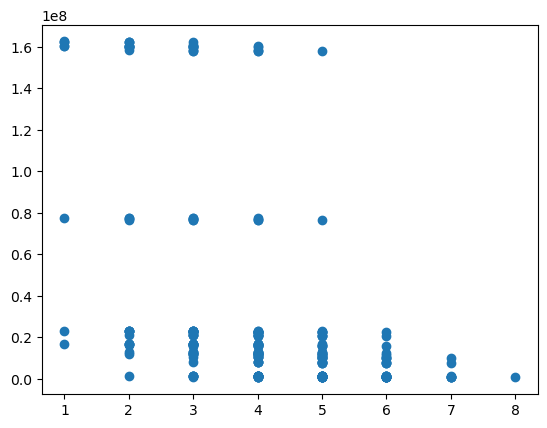

In [93]:
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.scatter([elem[0] for elem in all_models], [elem[1] for elem in all_models])

Also in this case the $R^2$ error is almost close to 1. The model suggest to continue to use all the predictors. We see that for the first 5 values, the plot is constant. Let now analize the data divided for type of store.

Mini stores

In [94]:
#step 2
X = mini_df_2.loc[:, mini_df_2.columns != 'avg_sales_amount']
y = mini_df_2["avg_sales_amount"]

best_features_MINI, best_metrics, all_models = best_subset_selection(X, y, 'avg_sales_amount')
MSE_LR_K_fold_mini = best_metrics["MSE"]

print("Features with best model:", best_features)
print("RSE:", best_metrics["RSE"])
print("R2:", best_metrics["R2"])
print("MSE:", best_metrics["MSE"])

start iteration 1 of 6
start iteration 2 of 6
start iteration 3 of 6
start iteration 4 of 6
start iteration 5 of 6
start iteration 6 of 6
----------------------- summary coefficients ---------------------------
                        OLS estimation          SE    t-stats        p-value
0                const    10005.770741  285.707127  35.021075  1.690897e-111
1          square_feet        0.095741    0.064905   1.475103   1.411679e-01
2        avg_customers        0.847451    0.604817   1.401169   1.621326e-01
3  competitor_distance       -0.003762    0.002407  -1.562976   1.190466e-01
4       has_promotions       25.560886  207.583831   0.123135   9.020773e-01
5                ITALY     -894.508978   53.255064 -16.796693   7.687939e-46
6                SPAIN     -420.881820   60.281595  -6.981929   1.687891e-11

Features with best model: ['square_feet', 'avg_customers', 'competitor_distance', 'has_promotions', 'ITALY', 'SPAIN', 'MINI', 'SUPER']
RSE: 373.24140949896685
R2: 0.6126331

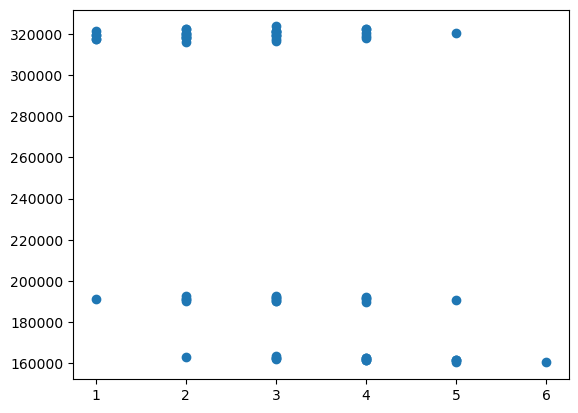

In [95]:
best_features_MINI= best_features
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.scatter([elem[0] for elem in all_models], [elem[1] for elem in all_models])

All the three errors have been improved, expecially $R^2$ that was 0.42 and now 0.61. The other two are more or less 40% less than before. The p-values of square_feet, avg_cstumers and competitor distance are arounnd 0.1 and their contribution for the cange of the target, under a delta change, is decreased. In particular the increases due to **square_feet** becomes 0.096 (it was 0.11), the one for **avg_costumers** is 0.84 (prevously 1.2) and **competitor_distance** decreses of 0.0038 (it was - 0.004) We can observe that the highest p-value is related to the predictor 'has_promotion' and since it is above 0.05 we agree with our previous claim that this predictor should not be considered.


super store

In [96]:
#step 2
X = super_df_2.loc[:, super_df_2.columns != 'avg_sales_amount']
y = super_df_2["avg_sales_amount"]

best_features_SUPER, best_metrics, all_models = best_subset_selection(X, y, 'avg_sales_amount')
MSE_LR_K_fold_super = best_metrics["MSE"]

print("Features with best model:", best_features_SUPER)
print("RSE:", best_metrics["RSE"])
print("R2:", best_metrics["R2"])
print("MSE:", best_metrics["MSE"])

start iteration 1 of 6
start iteration 2 of 6
start iteration 3 of 6
start iteration 4 of 6
start iteration 5 of 6
start iteration 6 of 6
----------------------- summary coefficients ---------------------------
                        OLS estimation          SE    t-stats        p-value
0          square_feet        0.083974    0.032019   2.622682   9.417000e-03
1        avg_customers        1.865734    0.481219   3.877098   1.446251e-04
2  competitor_distance       -0.010913    0.005061  -2.156463   3.227810e-02
3       has_promotions    20364.292506  289.113110  70.437112  3.918760e-140
4                ITALY    -2001.722307   83.749027 -23.901439   1.015019e-59
5                SPAIN     -943.807891   78.353753 -12.045471   2.598338e-25

Features with best model: ['square_feet', 'avg_customers', 'competitor_distance', 'ITALY', 'SPAIN']
RSE: 156.13752961290217
R2: 0.9699378894309172
MSE: 182032.452019498


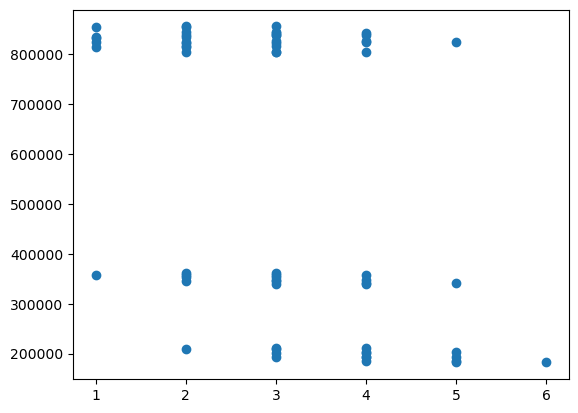

In [97]:
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.scatter([elem[0] for elem in all_models], [elem[1] for elem in all_models])

The errors do not have a great improvement in this case. However they were pretty good also in the previous case. As we suspected before, has_promotions is not suggested in the list of best features. This agrees with its p-value. For what concerns the other predictors, their change of 1 unit gives a smaller contribution to the improvement of the sales. Infact **square_feet** provides an improvement of 0.08 (previously 0.096), **avg_customers** of 1.87 (previously 2.05) and **competitor_distance** with a decresing of the sales of 0.01 remains constant. The plot is constant up to 5, as before.

hyper store

In [98]:
#step 2
X = hyper_df_2.loc[:, hyper_df_2.columns != 'avg_sales_amount']
y = hyper_df_2["avg_sales_amount"]

best_features_HYPER, best_metrics, all_models = best_subset_selection(X, y, 'avg_sales_amount')
MSE_LR_K_fold_hyper = best_metrics["MSE"]

print("Features with best model:", best_features_HYPER)
print("RSE:", best_metrics["RSE"])
print("R2:", best_metrics["R2"])
print("MSE:", best_metrics["MSE"])

start iteration 1 of 6
start iteration 2 of 6
start iteration 3 of 6
start iteration 4 of 6
start iteration 5 of 6
start iteration 6 of 6
----------------------- summary coefficients ---------------------------
                        OLS estimation          SE    t-stats       p-value
0          square_feet        0.276232    0.052679   5.243666  1.682824e-06
1        avg_customers        5.298685    0.878988   6.028165  7.591648e-08
2  competitor_distance       -0.051616    0.018262  -2.826392  6.175976e-03
3       has_promotions    45285.860614  901.827089  50.215680  1.757960e-55
4                ITALY    -4846.258598  269.844847 -17.959426  1.632936e-27
5                SPAIN    -2647.279805  260.881540 -10.147440  2.993401e-15

Features with best model: ['square_feet', 'avg_customers', 'competitor_distance', 'has_promotions', 'ITALY', 'SPAIN']
RSE: 2323.718382602162
R2: 0.6826861067770986
MSE: 1336820.9921913245


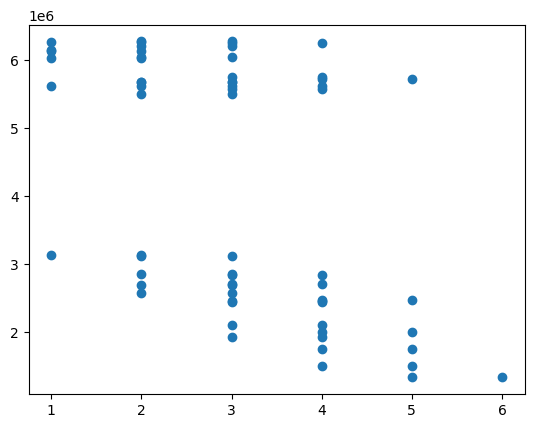

In [99]:
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.scatter([elem[0] for elem in all_models], [elem[1] for elem in all_models])

We notice that the $R^2$ is improved (from 0.62 to 0.68) and it can explain almost 70% of the variability, which is a good result. We see that all the estimators are considered as the p-values below 0.05 suggest, even if they are greater than before. Also in this case change of 1 unit of the predictor gives a smaller contribution to the improvement of the sales. Infact **square_feet** provides an improvement of 0.28 (previously 0.34), **avg_customers** of 5.3 (previously 6.86) and **competitor_distance** with a decresing of the sales of 0.05 while previously was 0.074.

## Partial Least Squares

Now we run a dimension reduction method: Partial least squares.

In [100]:
def PlS(X_subset, y):
  # Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_subset)
  X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)

  # save test error and n_components
  results_pls = []
  global best_components_pls
  best_components_pls = {"MSE": float("inf"), "n_components": float("inf")}

  # iterate over different values of lambda
  for n_components in range(1, len(X_scaled.columns) + 1):
      # transform using n_components for PLS
      pls = PLSRegression(n_components = n_components)

      # Note that for PLS the syntax is a bit different from the previous models

      # initialize empty array to store mse for each fold
      mse_folds = []
      # for each fold fit the model
      for train_idx, validation_idx in kf.split(X_scaled):
          X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
          y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
          pls.fit(X_train, y_train)
          y_pred = pls.predict(X_validation)
          y_pred = pd.Series([elem[0] for elem in y_pred])
          RSE, R2, MSE = calculate_metrics(y_validation.reset_index(drop=True), y_pred, X_subset)

          # Note: in the above line there is a "reset_index". Why?
          # Try to remove it and see what happens
          # Make some prints to understand why we need it... it's important to understand why!

          mse_folds.append(MSE)
      # estimate test error using the mean of MSE in all folds
      test_error_estimated = sum(mse_folds) / len(mse_folds)
      # append
      results_pls.append([test_error_estimated, n_components])
      # check if model improved
      if test_error_estimated < best_components_pls["MSE"]:
          best_components_pls["MSE"] = round(test_error_estimated,2)
          best_components_pls["n_components"] = n_components
  print()
  print('MSE:', best_components_pls["MSE"], 'number of components:', best_components_pls["n_components"] )

In [101]:
PlS(X_mini, y_mini)
MSE_PLS_mini= best_components_pls["MSE"]


MSE: 160330.69 number of components: 3


In [102]:
PlS(X_super, y_super)
MSE_PLS_super= best_components_pls["MSE"]


MSE: 182029.21 number of components: 4


In [103]:
PlS(X_hyper, y_hyper)
MSE_PLS_hyper= best_components_pls["MSE"]


MSE: 1336818.89 number of components: 4


The partial least squares method suggests to use only 4 components in each of the three case. We know that it uses also the taget to compute the new components, hence the 5 predictors and the target are rearrenged to compose 4 components. Given the previuos results, the predictor that has the smallest contribution is 'has_promotions'.

# Objective 2


For the previuos analysis, it is clear that the majority of the markets has promotion and since the new ones the company would like to open have them too, we drop the column 'has_promotion' from now on.This decision is corroboreted from the fact that the VIF Factors always suggested as not to consider it because and also features selection suggest the same (in some cases more than the others).

In [104]:
X_mini = X_mini.drop('has_promotions', axis=1)
X_super = X_super.drop('has_promotions', axis=1)
X_hyper = X_hyper.drop('has_promotions', axis=1)

Our aim now is to choose where to open 3 new stores, one for each type. To make this suggestion, we first test different models on the data we already have and then select the best one as the one with the lowest MSE.\
The following methods are non linear and we want to compare them with the one we already implemented.\
Notice that all the following methods (except Neural Network) are build as a defined function which standardize first and apply the method later.

### Polinomial regression

We are going to consider three different degrees for the polinomious:2,3 and 5.\
In order to run the following cells correctly it is necessary to change the degree each time.

In [105]:
def pol_reg(X_subset, y):
  # Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_subset)
  X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)

  # Number of splits for k-fold cross-validation
  k = 5

  # Split the data into k folds manually
  kf = KFold(n_splits=k, shuffle=True, random_state=99)

  # Initialize an array to store MSE values for each fold
  mse_folds = []

  # run k-fold cv
  for train_idx, validation_idx in kf.split(X_scaled):
      X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
      y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

      # polynomial degree 2, 3 or 5
      poly = PolynomialFeatures(2)
      X_train_poly = poly.fit_transform(X_train) # print the columns of X_train_poly: how many columns do you expect? check the documentation to understand why there are so many columns!
      X_validation_poly = poly.fit_transform(X_validation)

      # fit model
      model = LinearRegression()
      model.fit(X_train_poly, y_train)

      # get predictions
      y_pred = model.predict(X_validation_poly)
      current_mse = ((y_validation - y_pred)**2).mean()
      mse_folds.append(current_mse)


  # Calculate the mean MSE across folds
  global estimated_test_error_POL
  estimated_test_error_POL = sum(mse_folds) / len(mse_folds)

  print()
  print(f"The estimated test MSE error is {round(estimated_test_error_POL, 2)}")

Let analize **polinomials with degree equal to 2**.

In [106]:
pol_reg(X_mini, y_mini)

MSE_pol2_mini= estimated_test_error_POL


The estimated test MSE error is 177157.93


In [107]:
pol_reg(X_super, y_super)

MSE_pol2_super= round(estimated_test_error_POL, 2)


The estimated test MSE error is 233024.35


In [108]:
pol_reg(X_hyper, y_hyper)

MSE_pol2_hyper= round(estimated_test_error_POL, 2)


The estimated test MSE error is 2172150.04


Let analize **polinomials with degree equal to 3**.


In [109]:
pol_reg(X_mini, y_mini )

MSE_pol3_mini= round(estimated_test_error_POL, 2)


The estimated test MSE error is 177157.93


In [110]:
pol_reg(X_super, y_super)
MSE_pol3_super= round(estimated_test_error_POL, 2)


The estimated test MSE error is 233024.35


In [111]:
pol_reg(X_hyper, y_hyper)

MSE_pol3_hyper= round(estimated_test_error_POL, 2)


The estimated test MSE error is 2172150.04


Let analize **polinomials with degree equal to 5**.

In [112]:
pol_reg(X_mini, y_mini )

MSE_pol5_mini= round(estimated_test_error_POL, 2)


The estimated test MSE error is 177157.93


In [113]:
pol_reg(X_super, y_super)

MSE_pol5_super= round(estimated_test_error_POL, 2)


The estimated test MSE error is 233024.35


In [114]:
pol_reg(X_hyper, y_hyper)

MSE_pol5_hyper= round(estimated_test_error_POL, 2)


The estimated test MSE error is 2172150.04


Let now compare the results.

In [115]:
data = {
    'mini': [MSE_pol2_mini, MSE_pol3_mini, MSE_pol5_mini],
    'super': [MSE_pol2_super, MSE_pol3_super, MSE_pol5_super],
    'hyper': [MSE_pol2_hyper, MSE_pol3_hyper, MSE_pol5_hyper]
}

index = ['pol deg 2', 'pol deg 3', 'pol deg 5']

POL = pd.DataFrame(data, index=index)
print(POL)

                    mini      super       hyper
pol deg 2  177157.934676  233024.35  2172150.04
pol deg 3  177157.930000  233024.35  2172150.04
pol deg 5  177157.930000  233024.35  2172150.04


In [116]:
POL.idxmin()

mini     pol deg 3
super    pol deg 2
hyper    pol deg 2
dtype: object

We would consider polinomius with degrees equal to 2 for all the three types of market.

### GAM

For the Generalised Additive Model we also plot the approximations that are quite good in all the three cases.

In [117]:
def GAM(X_subset, y):

# Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_subset)
  X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)

  # initialize MSE and lambda
  best_lmbd_gam = {"MSE": float("inf"), "lmbd": float("inf")}

  k=5
  kf = KFold(n_splits=k, shuffle=True, random_state=99)

  # test different values of lambda (control smoothness)
  for lmbd in np.linspace(0, 10, 10):
      # Initialize an array to store MSE values for each fold
      mse_folds = []

      # run k-fold cv
      for train_idx, validation_idx in kf.split(X_scaled):
          X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
          y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

          # fit GAM: for each predictor add a smoothing spline (i.e. s(i)) and use lambda to control smoothness
          s_terms = [s(i, lam=lmbd) for i in range(len(X_train.columns))]
          global gam
          gam = LinearGAM(reduce(lambda x, y: x + y, s_terms))
          gam.fit(X_train, y_train)

          # get predictions
          y_pred = gam.predict(X_validation)
          current_mse = ((y_validation - y_pred)**2).mean()
          mse_folds.append(current_mse)

      # Calculate the mean MSE across folds
      global estimated_test_error_GAM
      estimated_test_error_GAM = sum(mse_folds) / len(mse_folds)

      # check if the estimated_test_error has decreased
      if estimated_test_error_GAM < best_lmbd_gam["MSE"]:
          best_lmbd_gam["MSE"] = estimated_test_error_GAM
          best_lmbd_gam["lmbd"] = lmbd

  print(f"The lowest estimated test error MSE is {round(best_lmbd_gam['MSE'], 2)}, obtained when lambda = {round(best_lmbd_gam['lmbd'], 2)}")

Mini

In [118]:
GAM(X_mini, y_mini)
MSE_GAM_mini= round(estimated_test_error_GAM,2)

The lowest estimated test error MSE is 171536.26, obtained when lambda = 10.0


<Figure size 640x480 with 0 Axes>

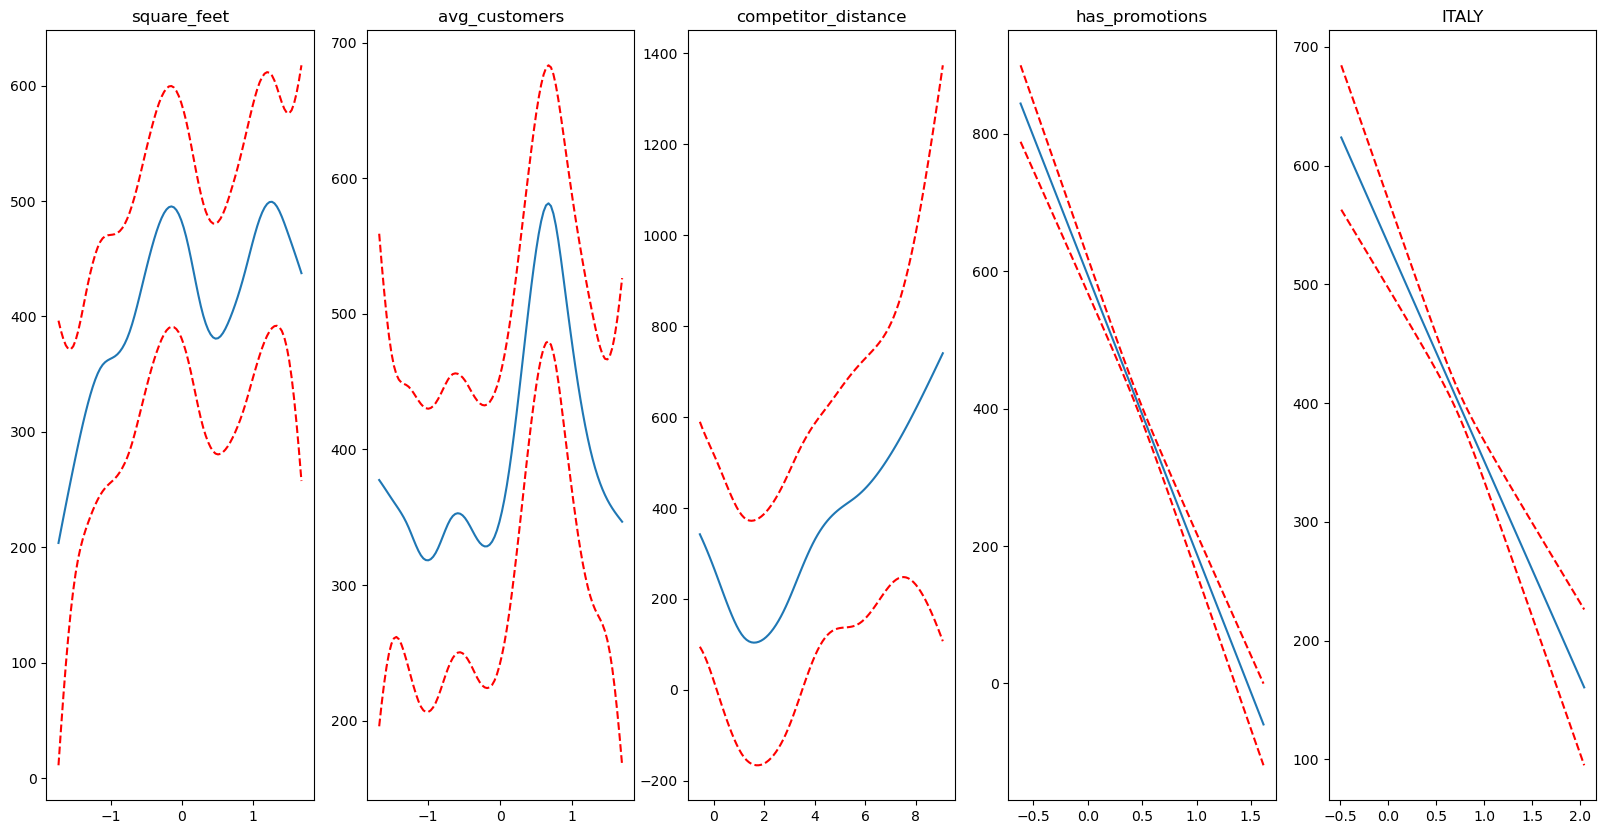

In [119]:
plt.figure()
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(best_features_MINI[i])

Super

In [120]:
GAM(X_super, y_super)
MSE_GAM_super= round(estimated_test_error_GAM,2)

The lowest estimated test error MSE is 341704.68, obtained when lambda = 10.0


<Figure size 640x480 with 0 Axes>

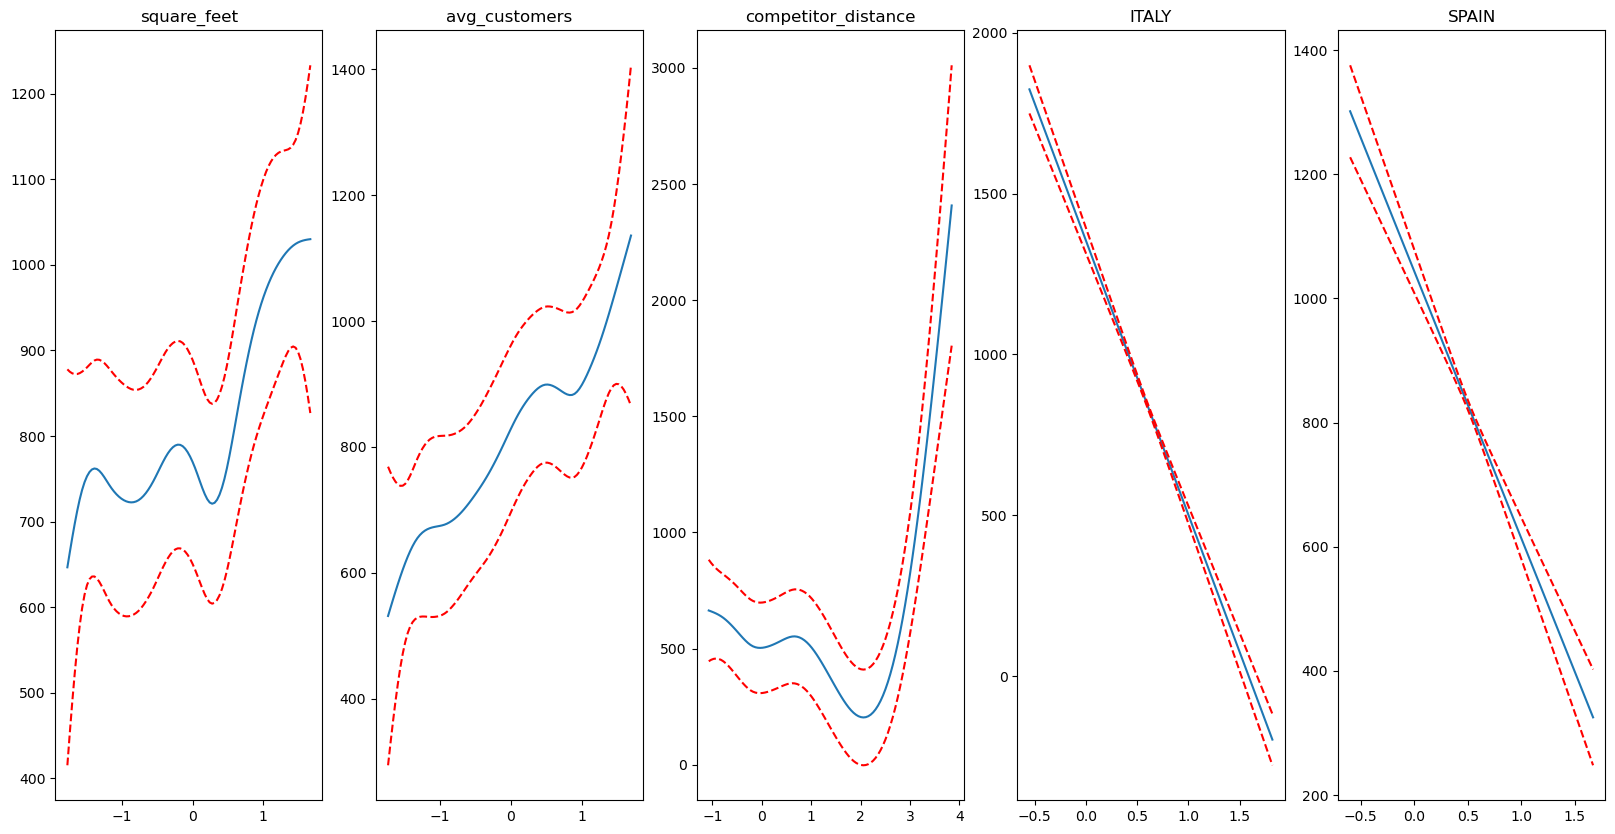

In [121]:
plt.figure()
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(best_features_SUPER[i])

Hyper

In [122]:
GAM(X_hyper, y_hyper)
MSE_GAM_hyper= round(estimated_test_error_GAM,2)

The lowest estimated test error MSE is 2622182.5, obtained when lambda = 2.22


<Figure size 640x480 with 0 Axes>

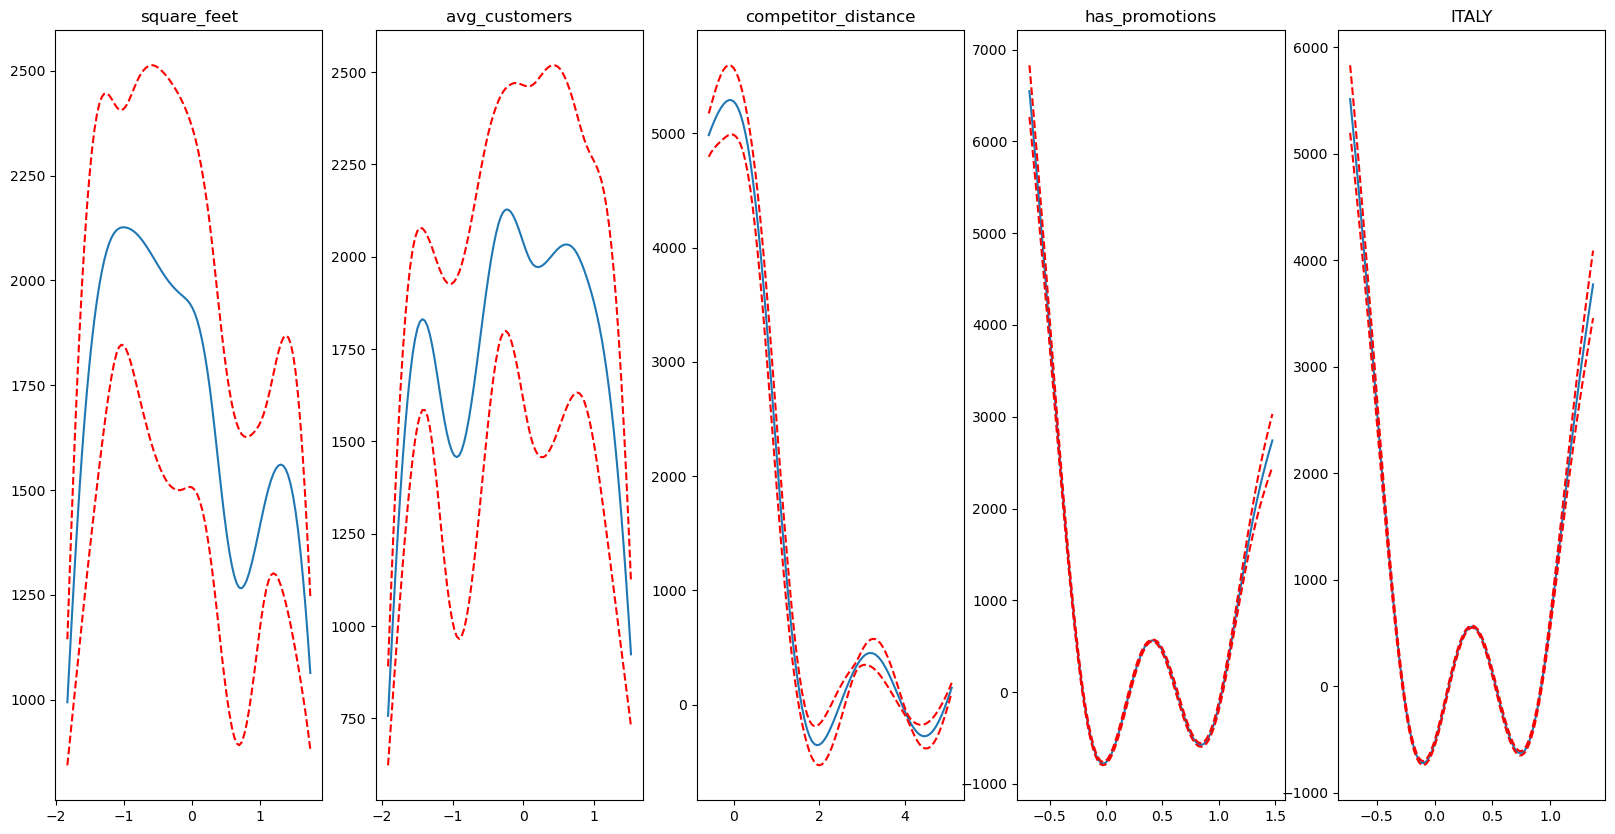

In [123]:
plt.figure()
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(best_features_HYPER[i])

### Decision tree

We implement now methods based on puning decision tree, hoping to achieve a good MSE while minimazing the variance.

In [124]:
def DT(X_subset, y):

  # Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_subset)
  X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)

  # initialize MSE and alpha
  best_alpha = {"MSE": float("inf"), "alpha": float("inf")}

  # fit a decision tree with all data to derive the alpha values (for tree pruning)
  tree = DecisionTreeRegressor(random_state=99)
  tree.fit(X_scaled, y)

  # get alpha values
  alphas = []
  for node in tree.cost_complexity_pruning_path(X_scaled, y).impurities:
      alphas.append(max(0, node))

  # test different values of alpha (control tree complexity)
  for alpha in alphas:

      # Initialize an array to store MSE values for each fold
      mse_folds = []

      # run k-fold cv
      for train_idx, validation_idx in kf.split(X_scaled):
          X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
          y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

          # fit pruned tree
          pruned_tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=99)
          pruned_tree.fit(X_train, y_train)

          # get predictions
          y_pred = pruned_tree.predict(X_validation)
          current_mse = ((y_validation - y_pred)**2).mean()
          mse_folds.append(current_mse)

      # Calculate the mean MSE across folds
      global estimated_test_error_DT
      estimated_test_error_DT = sum(mse_folds) / len(mse_folds)

      # check if the estimated_test_error has decreased
      if estimated_test_error_DT < best_alpha["MSE"]:
          best_alpha["MSE"] = estimated_test_error_DT
          best_alpha["alpha"] = alpha

  print(f"The lowest estimated test error MSE is {round(best_alpha['MSE'], 2)}, obtained when alpha = {round(best_alpha['alpha'], 2)}")

  # Train the final decision tree with the best alpha value and evaluate it on the test data
  global final_tree
  final_tree = DecisionTreeRegressor(ccp_alpha=best_alpha['alpha'], random_state=99)
  final_tree.fit(X_scaled, y)

Mini

In [125]:
DT(X_mini, y_mini)
MSE_DT_mini= round(estimated_test_error_DT,2)

The lowest estimated test error MSE is 162564.58, obtained when alpha = 10343.06


Super

In [126]:
DT(X_super, y_super)
MSE_DT_super= round(estimated_test_error_DT,2)

The lowest estimated test error MSE is 207659.34, obtained when alpha = 53118.99


Hyper

In [127]:
DT(X_hyper, y_hyper)
MSE_DT_hyper= round(estimated_test_error_DT,2)

The lowest estimated test error MSE is 3086932.46, obtained when alpha = 617553.3


### Random Forest

We are going to test the following method with the number of estimators equal to

*  500
*  100
* 50

Notice that is necessary to change the value in the definition of the function.

In [128]:
def R_F(X_subset, y):
  # Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_subset)
  X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)

  # Initialize an array to store MSE values for each fold
  mse_folds = []

  # run k-fold cv
  for train_idx, validation_idx in kf.split(X_scaled):
      X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
      y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

      # create a Random Forest n_estimators=50, 100 or 500
      model = RandomForestRegressor(n_estimators=50, max_features="sqrt", random_state=99, min_samples_split=8)

      # fit the model to the training data
      model.fit(X_train, y_train)

      # make predictions
      y_pred = model.predict(X_validation)
      current_mse = ((y_validation - y_pred)**2).mean()
      mse_folds.append(current_mse)


  # Calculate the mean MSE across folds
  global estimated_test_error_RF
  estimated_test_error_RF = sum(mse_folds) / len(mse_folds)
  print(f"The estimated test MSE error is {round(estimated_test_error_RF, 2)}")

### 500

Mini

In [129]:
R_F(X_mini, y_mini)
MSE_RF500_mini= round(estimated_test_error_RF, 2)

The estimated test MSE error is 170590.8


Super

In [130]:
R_F(X_super, y_super)
MSE_RF500_super= round(estimated_test_error_RF, 2)

The estimated test MSE error is 192950.59


Hyper

In [131]:
R_F(X_hyper, y_hyper)
MSE_RF500_hyper= round(estimated_test_error_RF, 2)

The estimated test MSE error is 2231926.15


### 100

In [132]:
R_F(X_mini, y_mini)
MSE_RF100_mini= round(estimated_test_error_RF, 2)

The estimated test MSE error is 170590.8


In [133]:
R_F(X_super, y_super)
MSE_RF100_super= round(estimated_test_error_RF, 2)

The estimated test MSE error is 192950.59


In [134]:
R_F(X_hyper, y_hyper)
MSE_RF100_hyper= round(estimated_test_error_RF, 2)

The estimated test MSE error is 2231926.15


### 50

In [135]:
R_F(X_mini, y_mini)
MSE_RF50_mini= round(estimated_test_error_RF, 2)

The estimated test MSE error is 170590.8


In [136]:
R_F(X_super, y_super)
MSE_RF50_super= round(estimated_test_error_RF, 2)

The estimated test MSE error is 192950.59


In [137]:
R_F(X_hyper, y_hyper)
MSE_RF50_hyper= round(estimated_test_error_RF, 2)

The estimated test MSE error is 2231926.15


Summary

In [138]:
data2= {
    'mini': [MSE_RF500_mini, MSE_RF100_mini, MSE_RF50_mini],
    'super': [MSE_RF500_super, MSE_RF100_super, MSE_RF50_super],
    'hyper': [MSE_RF500_hyper, MSE_RF100_hyper, MSE_RF50_hyper]

}
index=['500', '100', '50']

Rand_for = pd.DataFrame(data2, index=index)
print(Rand_for)

         mini      super       hyper
500  170590.8  192950.59  2231926.15
100  170590.8  192950.59  2231926.15
50   170590.8  192950.59  2231926.15


In [139]:
Rand_for.idxmin()

mini     500
super    500
hyper    500
dtype: object

It will be compared the MSE obtained from number of estimators= 500 for mini store anche hyper store and 50 for super store.

### Gradient Boosting

In [140]:
def Grad_Bost(X_subset, y):
  # Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_subset)
  X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)

  # Initialize an array to store MSE values for each fold
  mse_folds = []

  # run k-fold cv
  for train_idx, validation_idx in kf.split(X_scaled):
      X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
      y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

      # create a Random Forest
      model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, random_state=99)

      # fit the model to the training data
      model.fit(X_train, y_train)

      # make predictions
      y_pred = model.predict(X_validation)
      current_mse = ((y_validation - y_pred)**2).mean()
      mse_folds.append(current_mse)


  # Calculate the mean MSE across folds
  global estimated_test_error_GB
  estimated_test_error_GB = sum(mse_folds) / len(mse_folds)
  print(f"The estimated test MSE error is {round(estimated_test_error_GB, 2)}")

Mini

In [141]:
Grad_Bost(X_mini, y_mini)
MSE_GB_mini=round(estimated_test_error_GB, 2)

The estimated test MSE error is 199304.12


Super

In [142]:
Grad_Bost(X_super, y_super)
MSE_GB_super=round(estimated_test_error_GB, 2)

The estimated test MSE error is 265820.94


Hyper

In [143]:
Grad_Bost(X_hyper, y_hyper)
MSE_GB_hyper=round(estimated_test_error_GB, 2)

The estimated test MSE error is 2446085.98


### Support Verctor Regression

We now consider the regressin obtained from the Support Verctor Machine method. We will test 'rbf', 'poly', and 'linear' linear kernel and 'scale' and 'auto' as gamma.

In [144]:
def S_V_M (X_subset, y):
  # Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_subset)
  X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)

  # find best parameters
  parameters = {
      'C': np.linspace(1, 100, 10).tolist(),
      'kernel': ['rbf', 'poly', 'linear'],
      'gamma': ['scale', 'auto'] + np.linspace(0.01, 1, 10).tolist(),
  }

  # Create the SVM model
  svm = SVR()

  # Create the GridSearchCV
  grid_search = GridSearchCV(svm, parameters, cv=5)

  # Fit the GridSearchCV to the training data
  grid_search.fit(X_scaled, y)

  # Get the best parameters and the best score
  best_params = grid_search.best_params_

  print('The best parameters are:')
  print(best_params)
  print()

  # Now we can run k-fold using the best parameters

  # Initialize an array to store MSE values for each fold
  mse_folds = []

  # run k-fold cv
  for train_idx, validation_idx in kf.split(X_scaled):
      X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
      y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

      # fit model
      model = SVR(C=best_params["C"], kernel=best_params["kernel"], gamma=best_params["gamma"])
      model.fit(X_train, y_train)

      # get predictions
      y_pred = model.predict(X_validation)
      current_mse = ((y_validation - y_pred)**2).mean()
      mse_folds.append(current_mse)


  # Calculate the mean MSE across folds
  global estimated_test_error_SVM
  estimated_test_error_SVM = sum(mse_folds) / len(mse_folds)
  print(f"The estimated test MSE error is {round(estimated_test_error_SVM, 2)}")

In [145]:
S_V_M(X_mini, y_mini)
MSE_SVM_mini=round(estimated_test_error_SVM, 2)

The best parameters are:
{'C': 67.0, 'gamma': 'scale', 'kernel': 'linear'}

The estimated test MSE error is 163936.28


In [146]:
S_V_M(X_super, y_super)
MSE_SVM_super=round(estimated_test_error_SVM, 2)

The best parameters are:
{'C': 23.0, 'gamma': 'scale', 'kernel': 'linear'}

The estimated test MSE error is 177641.61


In [147]:
S_V_M(X_hyper, y_hyper)
MSE_SVM_hyper=round(estimated_test_error_SVM, 2)

The best parameters are:
{'C': 100.0, 'gamma': 'scale', 'kernel': 'linear'}

The estimated test MSE error is 1411484.96


### Neural Network

In [148]:
# define NN architecture
def create_model(input_size, hidden_sizes, output_size):
    layers = []
    for i in range(len(hidden_sizes)):
        if i == 0:
            layers.append(nn.Linear(input_size, hidden_sizes[i]))
        else:
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
        layers.append(nn.Sigmoid())
    layers.append(nn.Linear(hidden_sizes[-1], output_size))
    return nn.Sequential(*layers)

We are going to usa Sigmoid as activation function instead of ReLU.

Mini

In [149]:
X = X_mini
y = y_mini.to_numpy().reshape(-1, 1)


In [150]:
# standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#X = scaler.fit_transform(X_subset)

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

torch.manual_seed(99)
# convert the numpy arrays to pytorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)

In [151]:
input_size = X_train.shape[1]
hidden_sizes = [100, 100]
output_size = 1
learning_rate = 1e-3
num_epochs = 100
batch_size = 8

In [152]:
# call the model
model = create_model(input_size, hidden_sizes, output_size)

# define the loss function: MSE
criterion = nn.MSELoss()

# optimizer: in pytorch "gradient descent" is called SDG (stochastic gradient descent)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# for each epoch, do forward and backward
for epoch in range(num_epochs):
    for start in range(0, X_train_tensor.size(0), batch_size):
        # get batch
        X_batch = X_train_tensor[start: start+batch_size]
        y_batch = y_train_tensor[start: start+batch_size]

        # forward pass
        outputs = model.forward(X_batch)
        loss = criterion(outputs, y_batch)

        # backward pass and optimization (gradient descent)
        optimizer.zero_grad()  # reset gradient otherwise pytorch will use values from the previous iteration
        loss.backward()
        optimizer.step()

    # print the loss at every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}')

# evaluate the model on the validation set
with torch.no_grad():
    model.eval()
    y_pred = model.forward(X_val_tensor)
    valid_loss = criterion(y_pred, y_val_tensor)
    print()
    print(f'The estimated test MSE is: {valid_loss.item()}')

model_NN_mini= model

Epoch [10/100], Training Loss: 45929.0742
Epoch [20/100], Training Loss: 26574.1094
Epoch [30/100], Training Loss: 18510.7988
Epoch [40/100], Training Loss: 14809.5898
Epoch [50/100], Training Loss: 12828.5498
Epoch [60/100], Training Loss: 11919.0703
Epoch [70/100], Training Loss: 70501.2578
Epoch [80/100], Training Loss: 55687.9102
Epoch [90/100], Training Loss: 28226.7812
Epoch [100/100], Training Loss: 26118.3906

The estimated test MSE is: 122667.390625


In [153]:
X_mini

,square_feet,avg_customers,competitor_distance,ITALY,SPAIN
1,1402,252,522,0,0
2,1452,265,15939,0,0
4,2497,191,34007,0,0
5,1507,162,247,0,0
6,1582,217,20274,0,0
...,...,...,...,...,...
736,1910,165,81,0,0
742,1870,154,5777,1,0
743,1541,272,1161,0,1
744,2530,148,15859,1,0


In [154]:
MSE_NN_mini= 129980.37

Super

In [155]:
X = X_super
y = y_super.to_numpy().reshape(-1, 1)

In [156]:
# standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#X = scaler.fit_transform(X_subset)

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

torch.manual_seed(99)

# convert the numpy arrays to pytorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)

In [157]:
input_size = X_train.shape[1]
hidden_sizes = [100, 100]
output_size = 1
learning_rate = 1e-3
num_epochs = 100
batch_size = 8

In [158]:
# call the model
model = create_model(input_size, hidden_sizes, output_size)

# define the loss function: MSE
criterion = nn.MSELoss()

# optimizer: in pytorch "gradient descent" is called SDG (stochastic gradient descent)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# for each epoch, do forward and backward
for epoch in range(num_epochs):
    for start in range(0, X_train_tensor.size(0), batch_size):
        # get batch
        X_batch = X_train_tensor[start: start+batch_size]
        y_batch = y_train_tensor[start: start+batch_size]

        # forward pass
        outputs = model.forward(X_batch)
        loss = criterion(outputs, y_batch)

        # backward pass and optimization (gradient descent)
        optimizer.zero_grad()  # reset gradient otherwise pytorch will use values from the previous iteration
        loss.backward()
        optimizer.step()

    # print the loss at every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}')

# evaluate the model on the validation set
with torch.no_grad():
    model.eval()
    y_pred = model.forward(X_val_tensor)
    valid_loss = criterion(y_pred, y_val_tensor)
    print()
    print(f'The estimated test MSE is: {valid_loss.item()}')

Epoch [10/100], Training Loss: 1189225.5000
Epoch [20/100], Training Loss: 905015.1875
Epoch [30/100], Training Loss: 915048.7500
Epoch [40/100], Training Loss: 924356.6250
Epoch [50/100], Training Loss: 932713.1875
Epoch [60/100], Training Loss: 940125.5000
Epoch [70/100], Training Loss: 946699.6250
Epoch [80/100], Training Loss: 952546.8750
Epoch [90/100], Training Loss: 957789.0625
Epoch [100/100], Training Loss: 962488.6875

The estimated test MSE is: 210042.015625


In [159]:
MSE_NN_super= 217330.98

Hyper

In [160]:
X = X_hyper
y = y_hyper.to_numpy().reshape(-1, 1)

In [161]:
# standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_hyper)
#X = scaler.fit_transform(X_subset)

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

torch.manual_seed(99)

# convert the numpy arrays to pytorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)

In [162]:
input_size = X_train.shape[1]
hidden_sizes = [100, 100, 100]
output_size = 1
learning_rate = 1e-4
num_epochs = 100
batch_size = 8

In [163]:
# call the model
model = create_model(input_size, hidden_sizes, output_size)

# define the loss function: MSE
criterion = nn.MSELoss()

# optimizer: in pytorch "gradient descent" is called SDG (stochastic gradient descent)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# for each epoch, do forward and backward
for epoch in range(num_epochs):
    for start in range(0, X_train_tensor.size(0), batch_size):
        # get batch
        X_batch = X_train_tensor[start: start+batch_size]
        y_batch = y_train_tensor[start: start+batch_size]

        # forward pass
        outputs = model.forward(X_batch)
        loss = criterion(outputs, y_batch)

        # backward pass and optimization (gradient descent)
        optimizer.zero_grad()  # reset gradient otherwise pytorch will use values from the previous iteration
        loss.backward()
        optimizer.step()

    # print the loss at every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}')

# evaluate the model on the validation set
with torch.no_grad():
    model.eval()
    y_pred = model.forward(X_val_tensor)
    valid_loss = criterion(y_pred, y_val_tensor)
    print()
    print(f'The estimated test MSE is: {valid_loss.item()}')

Epoch [10/100], Training Loss: 89424576.0000
Epoch [20/100], Training Loss: 12720786.0000
Epoch [30/100], Training Loss: 7847242.5000
Epoch [40/100], Training Loss: 7299938.5000
Epoch [50/100], Training Loss: 7230280.0000
Epoch [60/100], Training Loss: 7221270.5000
Epoch [70/100], Training Loss: 7220074.0000
Epoch [80/100], Training Loss: 7219948.0000
Epoch [90/100], Training Loss: 7219948.0000
Epoch [100/100], Training Loss: 7219948.0000

The estimated test MSE is: 4579000.0


In [164]:
MSE_NN_hyper=4579000.0

### Ridge

In [165]:
def RIDGE(X_subset, y):
  # Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_subset)
  X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)

  # save test error and lambda values
  results_ridge = []
  global best_lmbd_ridge
  best_lmbd_ridge = {"MSE": float("inf"), "lmbd": float("inf")}

  # iterate over different values of lambda
  for lmbd in np.linspace(0.0001, 20, 100):
      # initialize empty array to store mse for each fold
      mse_folds = []
      # for each fold fit the model
      for train_idx, validation_idx in kf.split(X_scaled):
          X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
          y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
          model = Ridge(alpha=lmbd).fit(X_train, y_train)
          y_pred = model.predict(X_validation)
          RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X_subset)
          mse_folds.append(MSE)
      # estimate test error using the mean of MSE in all folds
      test_error_estimated = sum(mse_folds) / len(mse_folds)
      # append
      results_ridge.append([test_error_estimated, lmbd])
      # check if model improved
      if test_error_estimated < best_lmbd_ridge["MSE"]:
          best_lmbd_ridge["MSE"] = test_error_estimated
          best_lmbd_ridge["lmbd"] = lmbd
  print()
  print('best mse: ', best_lmbd_ridge["MSE"], 'best lambda:', best_lmbd_ridge["lmbd"] )

In [166]:
RIDGE(X_mini, y_mini)
MSE_RIDGE_mini= best_lmbd_ridge['MSE']


best mse:  160243.17571987901 best lambda: 1.8182727272727275


In [167]:
RIDGE(X_super, y_super)
MSE_RIDGE_super= best_lmbd_ridge['MSE']


best mse:  181986.97256760797 best lambda: 1.2122151515151516


In [168]:
RIDGE(X_hyper, y_hyper)
MSE_RIDGE_hyper= best_lmbd_ridge['MSE']


best mse:  1334484.548112226 best lambda: 0.8081767676767677


### Lasso

In [169]:
def LASSO(X_subset, y):
  # Standardize features by removing the mean and scaling to unit variance
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_subset)
  X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)

  # save test error and lambda values
  results_lasso = []
  global best_lmbd_lasso
  best_lmbd_lasso = {"MSE": float("inf"), "lmbd": float("inf")}

  # iterate over different values of lambda
  for lmbd in np.linspace(0.0001, 0.05, 100):
      # initialize empty array to store mse for each fold
      mse_folds = []
      # for each fold fit the model
      for train_idx, validation_idx in kf.split(X_scaled):
          X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
          y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
          model = Lasso(alpha=lmbd).fit(X_train, y_train)
          y_pred = model.predict(X_validation)
          RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X_subset)
          mse_folds.append(MSE)
      # estimate test error using the mean of MSE in all folds
      test_error_estimated = sum(mse_folds) / len(mse_folds)
      # append
      results_lasso.append([test_error_estimated, lmbd])
      # check if model improved
      if test_error_estimated < best_lmbd_lasso["MSE"]:
          best_lmbd_lasso["MSE"] = test_error_estimated
          best_lmbd_lasso["lmbd"] = lmbd
  print()
  print('MSE:', best_lmbd_lasso["MSE"], 'lambda:', best_lmbd_lasso["lmbd"])

In [170]:
LASSO(X_mini, y_mini)
MSE_LASSO_mini= best_lmbd_lasso["MSE"]


MSE: 160251.52138581368 lambda: 0.0001


In [171]:
LASSO(X_super, y_super)
MSE_LASSO_super= best_lmbd_lasso["MSE"]


MSE: 182030.37672957015 lambda: 0.05


In [172]:
LASSO(X_hyper, y_hyper)
MSE_LASSO_hyper= best_lmbd_lasso["MSE"]


MSE: 1336813.644591606 lambda: 0.05


## Final decision

Now we need to compare the MSE for each method and decide which apply for our aim.

In [173]:
data= {
    'mini': [MSE_LR_mini,MSE_LR_K_fold_mini, MSE_pol2_mini, MSE_GAM_mini, MSE_DT_mini, MSE_RF500_mini, MSE_GB_mini, MSE_SVM_mini, MSE_NN_mini, MSE_RIDGE_mini, MSE_LASSO_mini, MSE_PLS_mini],
    'super': [MSE_LR_super, MSE_LR_K_fold_super, MSE_pol2_super, MSE_GAM_super, MSE_DT_super, MSE_RF50_super, MSE_GB_super, MSE_SVM_super, MSE_NN_super,  MSE_RIDGE_super, MSE_LASSO_super, MSE_PLS_super],
    'hyper': [MSE_LR_hyper, MSE_LR_K_fold_hyper, MSE_pol2_hyper, MSE_GAM_hyper, MSE_DT_hyper, MSE_RF500_hyper, MSE_GB_hyper, MSE_SVM_hyper, MSE_NN_hyper,  MSE_RIDGE_hyper, MSE_LASSO_hyper, MSE_PLS_hyper ]
}

index= ['Linear Regression','k-fold Linear Regressin', 'Polinomial regression', 'GAM' , 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Support Verctor Regression', 'Neural Network', 'Ridge', 'Lasso', 'Partial Least Squares']
errors_df = pd.DataFrame(data, index=index)
errors_df

,mini,super,hyper
Linear Regression,246323.900000,27524.790000,2.437617e+06
k-fold Linear Regressin,160251.521162,182032.452019,1.336821e+06
Polinomial regression,177157.934676,233024.350000,2.172150e+06
GAM,171536.260000,341704.680000,3.743719e+06
Decision Tree,318436.380000,833162.300000,6.139872e+06
Random Forest,170590.800000,192950.590000,2.231926e+06
Gradient Boosting,199304.120000,265820.940000,2.446086e+06
Support Verctor Regression,163936.280000,177641.610000,1.411485e+06
Neural Network,129980.370000,217330.980000,4.579000e+06
Ridge,160243.175720,181986.972568,1.334485e+06


In [174]:
errors_df.idxmin()

mini        Neural Network
super    Linear Regression
hyper                Ridge
dtype: object

Let now save the new data we want to test. Notice that we do not add the column 'has_promotion' since it contains only yes and we have also dropped it in the previuos analysis.

In [175]:
mini_data = pd.DataFrame([
    [1850, 190, 4500 , 0, 1],
    [2100, 215, 1850, 0, 0],
    [1920, 220,1450, 1, 0]
], columns = ['square_feet', 'avg_customers', 'competitor_distance',  'italy', 'spain']
)
super_data = pd.DataFrame([
    [5880, 420, 580, 0, 1],
    [5120, 390, 2560, 0, 0],
    [4970, 410, 3520, 1, 0]
], columns = ['square_feet', 'avg_customers', 'competitor_distance', 'ITALY', 'SPAIN']
)

hyper_data = pd.DataFrame([
    [10560, 860, 8940, 0, 1],
    [12570, 880, 7580, 0, 0],
    [11980, 790, 11560, 1, 0]
], columns = ['square_feet', 'avg_customers', 'competitor_distance', 'ITALY', 'SPAIN']
)


For **mini** we have to use the neural network.

In [176]:
mini_data

,square_feet,avg_customers,competitor_distance,italy,spain
0,1850,190,4500,0,1
1,2100,215,1850,0,0
2,1920,220,1450,1,0


In [177]:
X_mini=mini_data
scaler= StandardScaler()
X_mini_scaled=scaler.fit_transform(X_mini)

X_tensor=torch.FloatTensor(X_mini_scaled)

y_mini=model_NN_mini.forward(X_tensor)
print(y_mini)

tensor([[ 9952.8652],
        [10436.5879],
        [ 9591.3232]], grad_fn=<AddmmBackward0>)


The maximun sales predicted is 10460.5 which corresponds to open a ministore in **France.**

For **super** store we are going to use Linear Regression.

In [178]:
super_data

,square_feet,avg_customers,competitor_distance,ITALY,SPAIN
0,5880,420,580,0,1
1,5120,390,2560,0,0
2,4970,410,3520,1,0


In [179]:
#we need to save the model
super_df_2= super_df_2.drop('has_promotions', axis=1)

X_super_model = super_df_2.loc[:, super_df_2.columns != 'avg_sales_amount']
y_super = super_df_2["avg_sales_amount"]

Multi_LinearRegression(X_super_model, y_super)
MSE_LR_super =  MSE
model_LR_super= model_LR

----------------------- summary coefficients ---------------------------
                        OLS estimation          SE    t-stats        p-value
0                const    20214.654868  283.070814  71.412007  3.004811e-141
1          square_feet        0.096008    0.031121   3.085014   2.332681e-03
2        avg_customers        2.049874    0.470890   4.353193   2.169107e-05
3  competitor_distance       -0.010367    0.005322  -1.948062   5.285030e-02
4                ITALY    -1988.402913   82.602011 -24.072088   3.609497e-60
5                SPAIN     -923.356991   78.190008 -11.809143   1.335973e-24

--------------------- confidence intervals --------------------
The 95% confidence interval for const is [19656.36349316 20772.94624374]
The 95% confidence interval for square_feet is [0.03462948 0.15738628]
The 95% confidence interval for avg_customers is [1.12115343 2.97859468]
The 95% confidence interval for competitor_distance is [-0.02086282  0.00012882]
The 95% confidence interv

In [180]:
X_super=super_data
X_super_with_intercept=sm.add_constant(X_super)
y_super=model_LR_super.predict(X_super_with_intercept)
print(y_super)

0    20710.758447
1    21479.126564
2    19507.367628
dtype: float64


The maximun sales predicted is 21479.13 which corresponds to open an super store in **France**.

Let now consider **hyper** stores.

In [181]:
hyper_data

,square_feet,avg_customers,competitor_distance,ITALY,SPAIN
0,10560,860,8940,0,1
1,12570,880,7580,0,0
2,11980,790,11560,1,0


We need to save the model.

In [182]:
# Standardize features by removing the mean and scaling to unit variance
y=y_hyper
X_subset= X_hyper

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_hyper)
X_scaled = pd.DataFrame(X_scaled, columns=X_hyper.columns)

results_ridge = []
best_lmbd_ridge = {"MSE": float("inf"), "lmbd": float("inf")}

  # iterate over different values of lambda
for lmbd in np.linspace(0.0001, 20, 100):
      # initialize empty array to store mse for each fold
    mse_folds = []
      # for each fold fit the model
    for train_idx, validation_idx in kf.split(X_scaled):
          X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
          y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
          model = Ridge(alpha=lmbd).fit(X_train, y_train)
          y_pred = model.predict(X_validation)
          RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X_subset)
          mse_folds.append(MSE)
      # estimate test error using the mean of MSE in all folds
    test_error_estimated = sum(mse_folds) / len(mse_folds)
      # append
    results_ridge.append([test_error_estimated, lmbd])
      # check if model improved
    if test_error_estimated < best_lmbd_ridge["MSE"]:
          best_lmbd_ridge["MSE"] = test_error_estimated
          best_lmbd_ridge["lmbd"] = lmbd

model_Ridge_hyper= model

In [183]:
X_hyper=hyper_data
scaler=StandardScaler()
X_hyper_scaled= scaler.fit_transform(X_hyper)
X_hyper_scaled = pd.DataFrame(X_hyper_scaled, columns=X_hyper.columns)

y_hyper=model_Ridge_hyper.predict(X_hyper_scaled)
print(y_hyper)

[49525.26173922 52463.58247236 47465.82809152]


The maximun sales predicted is 52463.58 which corresponds to open an hyper store in **France**.